## Part 1

In [3]:
### Exercise 2: Download SUSY Dataset

!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  10.3M      0 --:--:--  0:01:24 --:--:-- 31.3M   0 --:--:--  0:00:08 --:--:-- 12.7M     0 --:--:--  0:00:20 --:--:-- 11.3M 0 --:--:--  0:00:38 --:--:-- 5904k0 --:--:--  0:01:13 --:--:-- 10.2M0:01:21 --:--:-- 28.7M


In [4]:
!rm SUSY.csv

In [5]:
!gunzip SUSY.csv.gz

In [6]:
ls -lh

total 5152192
-rw-r--r--  1 lauratm  staff    35K Feb 14 13:05 Lab.3_Solutions.ipynb
-rw-r--r--  1 lauratm  staff    41K Feb 21 15:41 Lab.4_Solutions.ipynb
-rw-r--r--  1 lauratm  staff    32K Feb 28 14:04 Lab.5_Solutions.ipynb
-rw-r--r--  1 lauratm  staff   6.8M Mar 21 15:26 Lab.6_Solutions.ipynb
-rw-r--r--  1 lauratm  staff    26K Mar 23 15:02 Lab.7_Part1&Part2.ipynb
-rw-r--r--  1 lauratm  staff   228M Mar 21 15:18 SUSY-small.csv
-rw-r--r--  1 lauratm  staff   2.2G Mar 23 15:04 SUSY.csv
-rw-r--r--  1 lauratm  staff    25K Jan 31 14:33 Solution.Lab.2.ipynb
-rw-r--r--  1 lauratm  staff    30K Feb 28 14:17 Solutions_Lab.5.ipynb
-rw-r--r--  1 lauratm  staff   154K Mar 18 19:14 blackjack_uml.png
-rw-r--r--  1 lauratm  staff   153B Feb 21 15:39 drawing.txt
-rw-r--r--@ 1 lauratm  staff   131B Feb 21 13:48 raster_drawing.txt


In [7]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [8]:
#### Reducing the dataset
!wc -l SUSY.csv

 5000000 SUSY.csv


In [9]:
!head -500000 SUSY.csv > SUSY-small.csv

In [10]:
ls -lh

total 5176984
-rw-r--r--  1 lauratm  staff    35K Feb 14 13:05 Lab.3_Solutions.ipynb
-rw-r--r--  1 lauratm  staff    41K Feb 21 15:41 Lab.4_Solutions.ipynb
-rw-r--r--  1 lauratm  staff    32K Feb 28 14:04 Lab.5_Solutions.ipynb
-rw-r--r--  1 lauratm  staff   6.8M Mar 21 15:26 Lab.6_Solutions.ipynb
-rw-r--r--  1 lauratm  staff    26K Mar 23 15:02 Lab.7_Part1&Part2.ipynb
-rw-r--r--  1 lauratm  staff   228M Mar 23 15:04 SUSY-small.csv
-rw-r--r--  1 lauratm  staff   2.2G Mar 23 15:04 SUSY.csv
-rw-r--r--  1 lauratm  staff    25K Jan 31 14:33 Solution.Lab.2.ipynb
-rw-r--r--  1 lauratm  staff    30K Feb 28 14:17 Solutions_Lab.5.ipynb
-rw-r--r--  1 lauratm  staff   154K Mar 18 19:14 blackjack_uml.png
-rw-r--r--  1 lauratm  staff   153B Feb 21 15:39 drawing.txt
-rw-r--r--@ 1 lauratm  staff   131B Feb 21 13:48 raster_drawing.txt


In [11]:
! wc -l SUSY-small.csv

  500000 SUSY-small.csv


In [12]:
#### First look

VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

In [13]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [14]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [15]:
FeatureNames

['M_R',
 'M_TR_2',
 'dPhi_r_b',
 'M_Delta_R',
 'R',
 'MET_rel',
 'cos_theta_r1',
 'S_R',
 'MT2',
 'axial_MET']

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0           0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1           1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2           1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3           1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4           1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...         ...       ...       ...       ...       ...       ...       ...   
4999995     1.0  0.853325 -0.961783 -1.487277  0.678190  0.493580  1.647969   
4999996     0.0  0.951581  0.139370  1.436884  0.880440 -0.351948 -0.740852   
4999997     0.0  0.840389  1.419162 -1.218766  1.195631  1.695645  0.663756   
4999998     1.0  1.784218 -0.833565 -0.560091  0.953342 -0.688969 -1.428233   
4999999     0.0  0.761500  0.680454 -1.186213  1.043521 -0.316755  0.246879   

              MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2  \
0        0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637   
1        3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051   
2        1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514   
3        2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211   
4        1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218   
...           ...       ...       ...        ...       ...       ...   
4999995  1.843867  0.276954  1.025105  -1.486535  0.892879  1.684429   
4999996  0.290863 -0.732360  0.001360   0.257738  0.802871  0.545319   
4999997  0.490888 -0.509186  0.704289   0.045744  0.825015  0.723530   
4999998  2.660703 -0.861344  2.116892   2.906151  1.232334  0.952444   
4999999  1.120280  0.998479  1.640881  -0.797688  0.854212  1.121858   

                R       MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0        0.410772  1.145621  1.932632   0.994464  1.367815      0.040714  
1        0.481928  0.000000  0.448410   0.205356  1.321893      0.377584  
2        1.587535  2.024308  0.603498   1.562374  1.135454      0.180910  
3        1.582217  1.551914  0.761215   1.715464  1.492257      0.090719  
4        0.728563  0.000000  1.083158   0.043429  1.154854      0.094859  
...           ...       ...       ...        ...       ...           ...  
4999995  1.674084  3.366298  1.046707   2.646649  1.389226      0.364599  
4999996  0.602730  0.002998  0.748959   0.401166  0.443471      0.239953  
4999997  0.778236  0.752942  0.838953   0.614048  1.210595      0.026692  
4999998  0.685846  0.000000  0.781874   0.676003  1.197807      0.093689  
4999999  1.165438  1.498351  0.931580   1.293524  1.539167      0.187496  

[5000000 rows x 19 columns]

In [18]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

l_1_pT


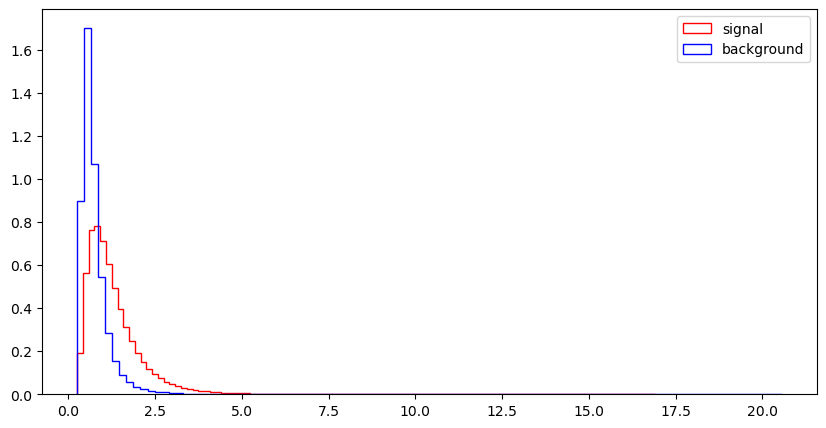

l_1_eta


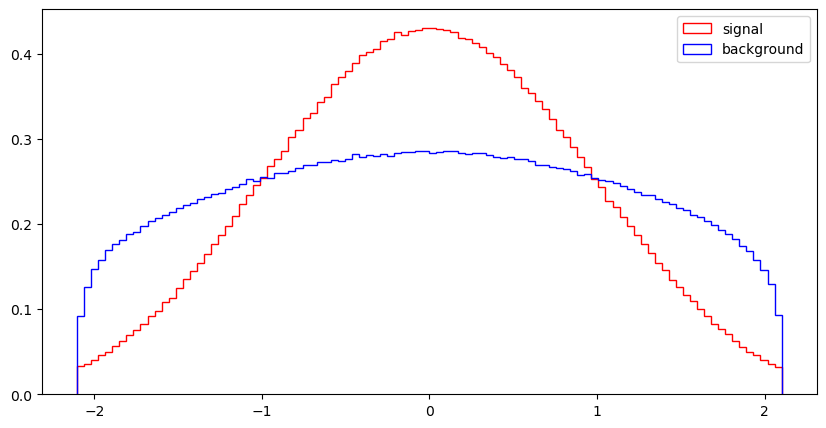

l_1_phi


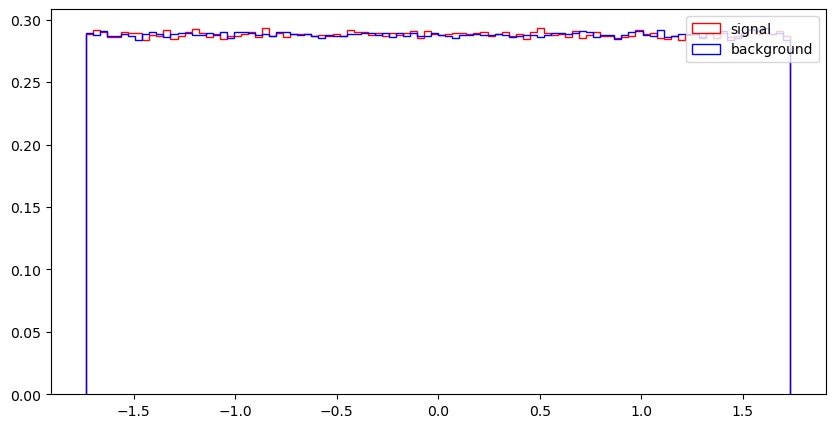

l_2_pT


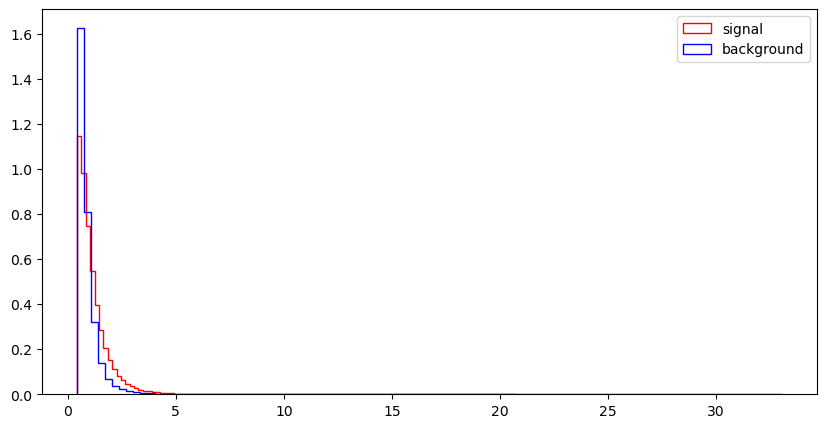

l_2_eta


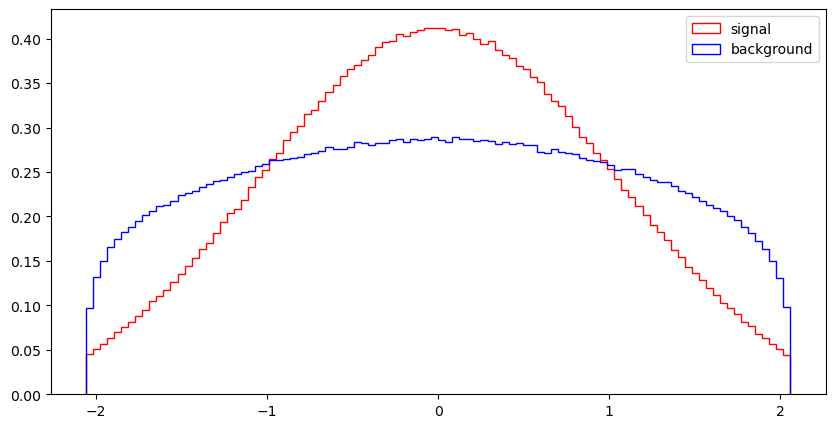

l_2_phi


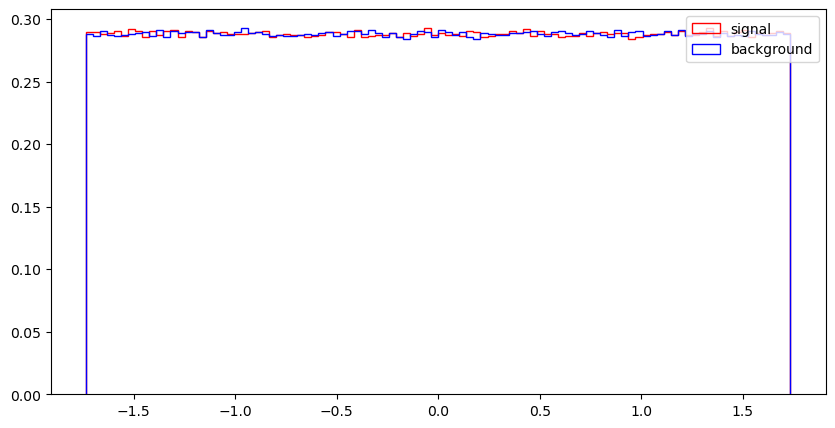

MET


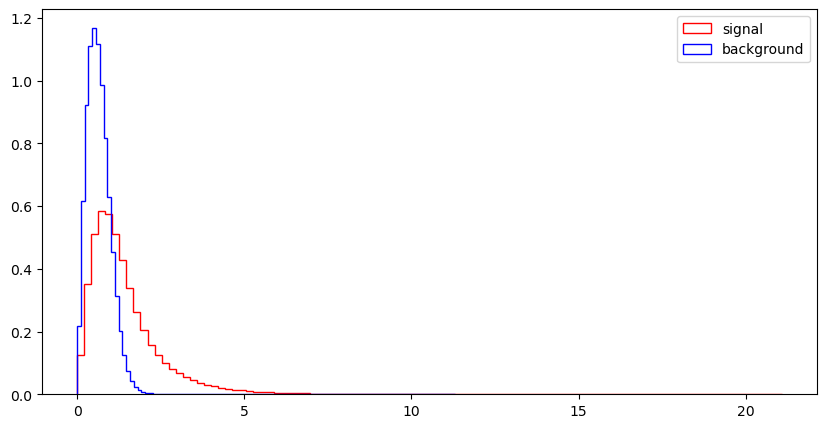

MET_phi


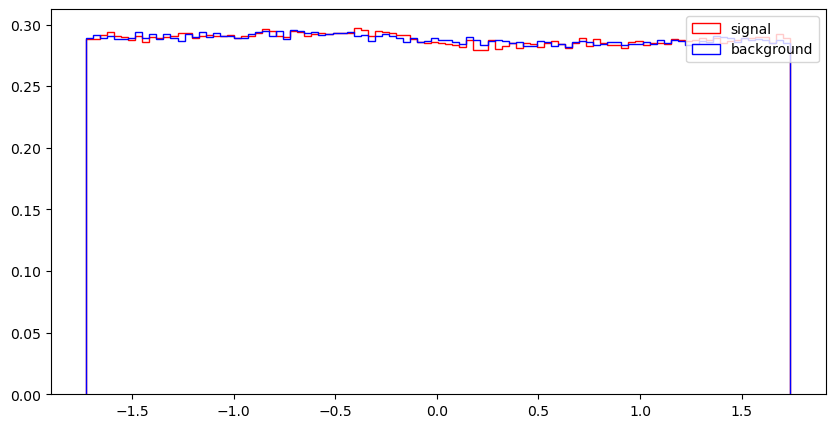

MET_rel


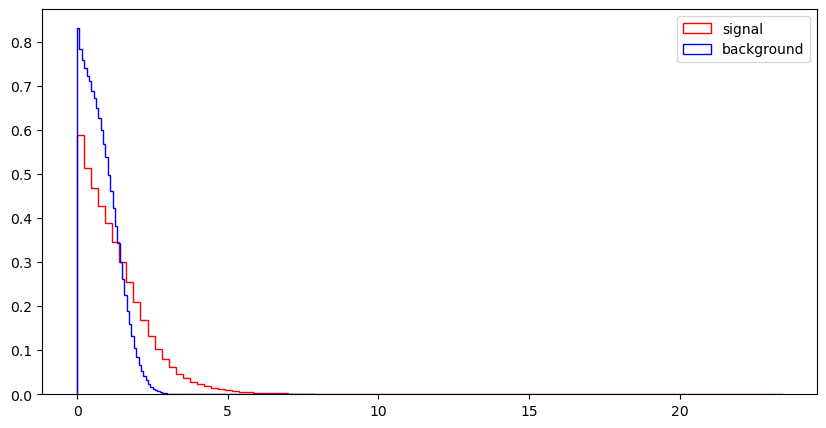

axial_MET


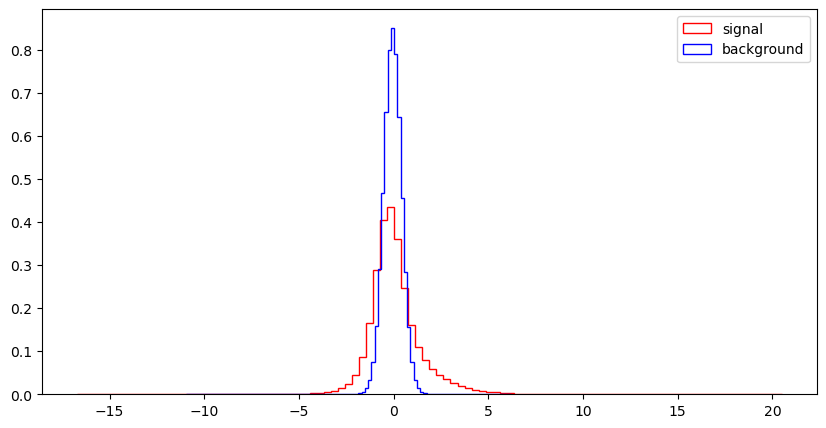

M_R


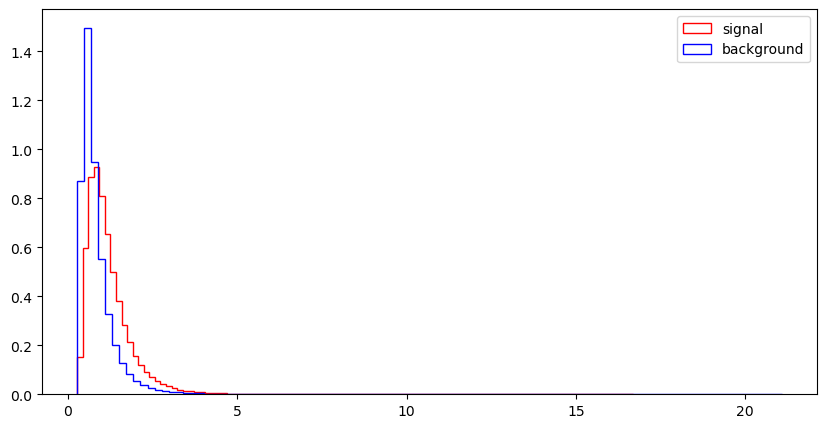

M_TR_2


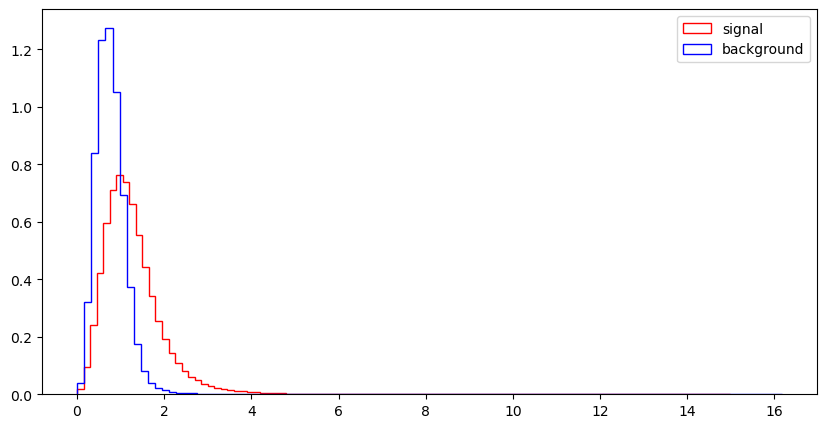

R


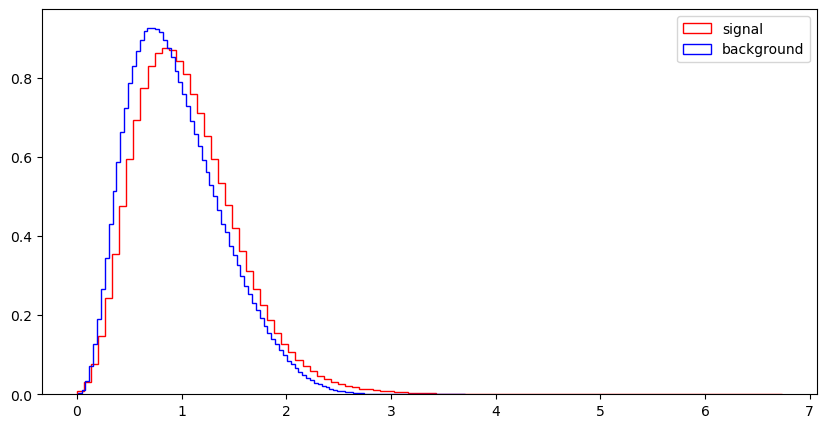

MT2


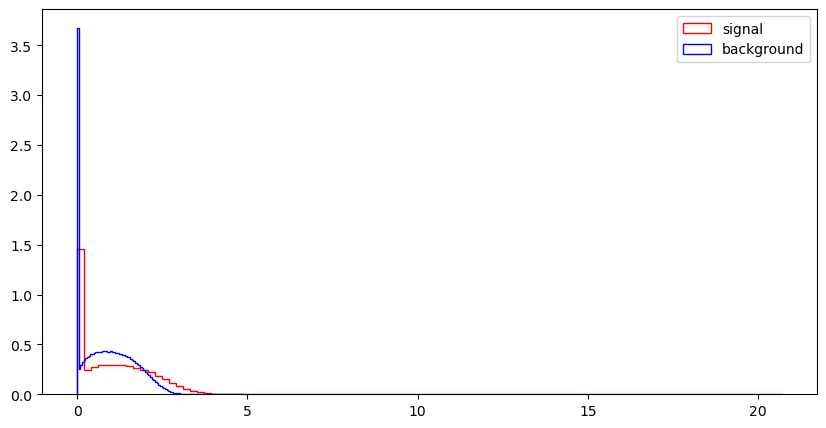

S_R


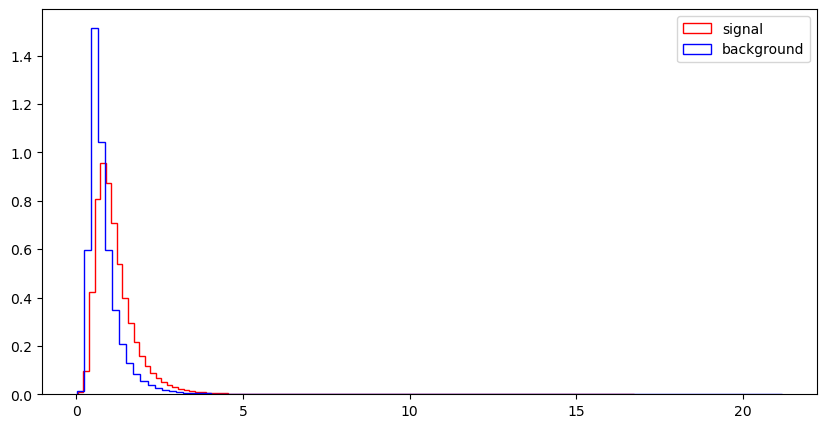

M_Delta_R


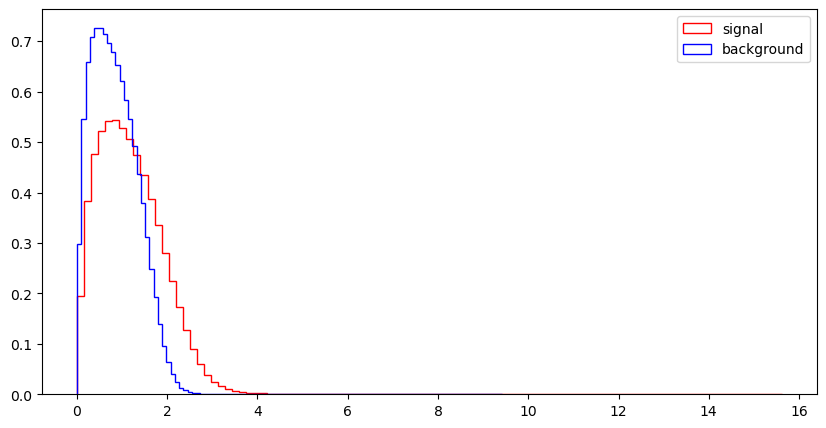

dPhi_r_b


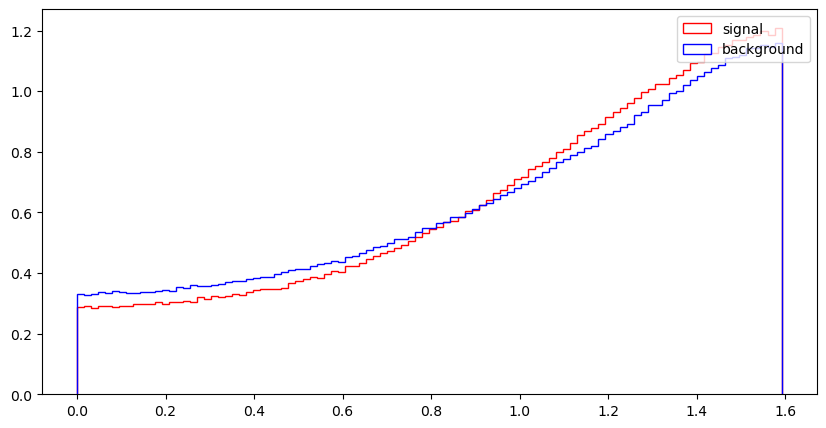

cos_theta_r1


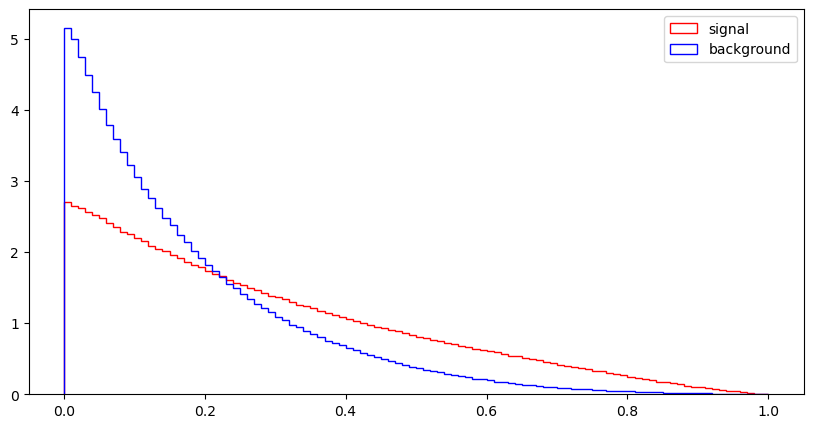

In [19]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

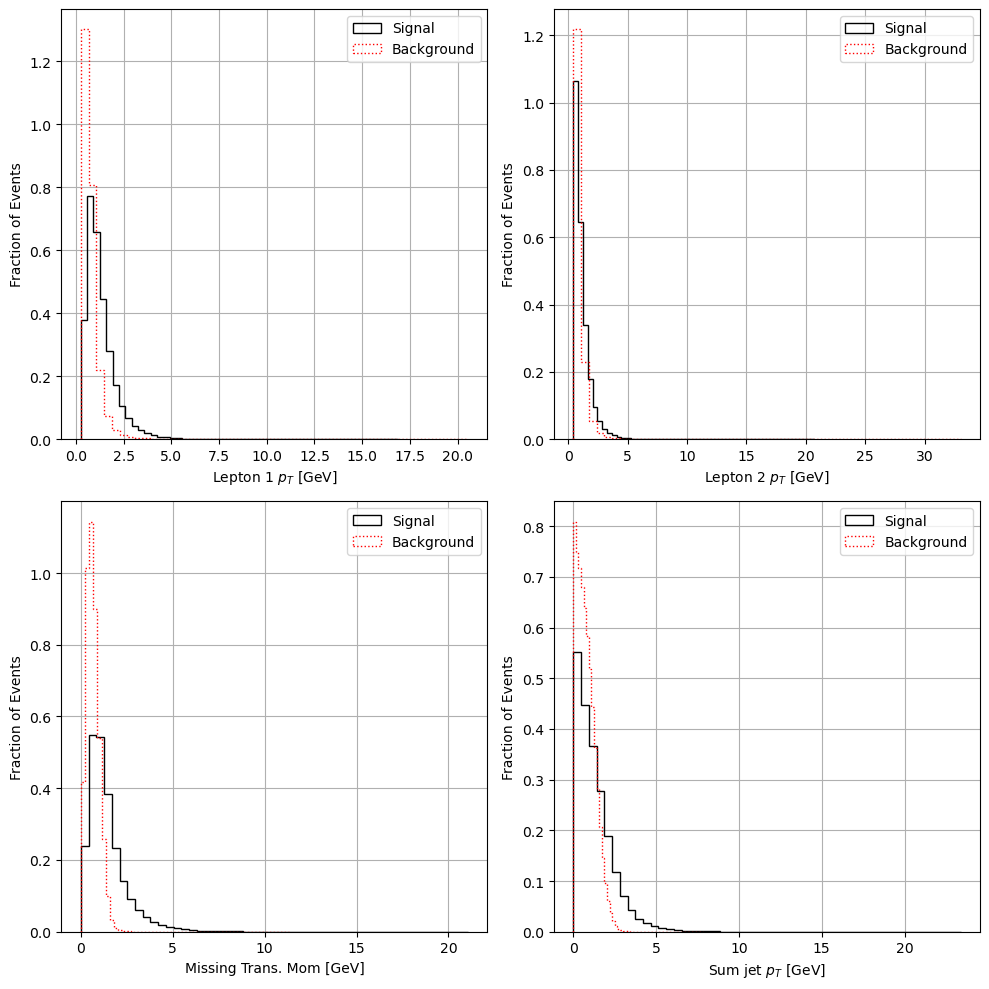

In [20]:
### Exercise 3: Make nice figures
#### FIG 5

low_level_features = ["l_1_pT", "l_2_pT", "MET", "MET_rel"]  # Approximate Sum jet pT with MET_rel
plot_labels = [
    "Lepton 1 $p_T$ [GeV]",
    "Lepton 2 $p_T$ [GeV]",
    "Missing Trans. Mom [GeV]",
    "Sum jet $p_T$ [GeV]"  # Approximate with MET_rel
]

# Plot settings
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 
axes = axes.flatten()

for i, feature in enumerate(low_level_features):
    ax = axes[i]
    ax.hist(df_sig[feature], bins=50, histtype="step", color="black", label="Signal", density=True)
    ax.hist(df_bkg[feature], bins=50, histtype="step", color="red", linestyle="dotted", label="Background", density=True)
    ax.set_xlabel(plot_labels[i])
    ax.set_ylabel("Fraction of Events")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


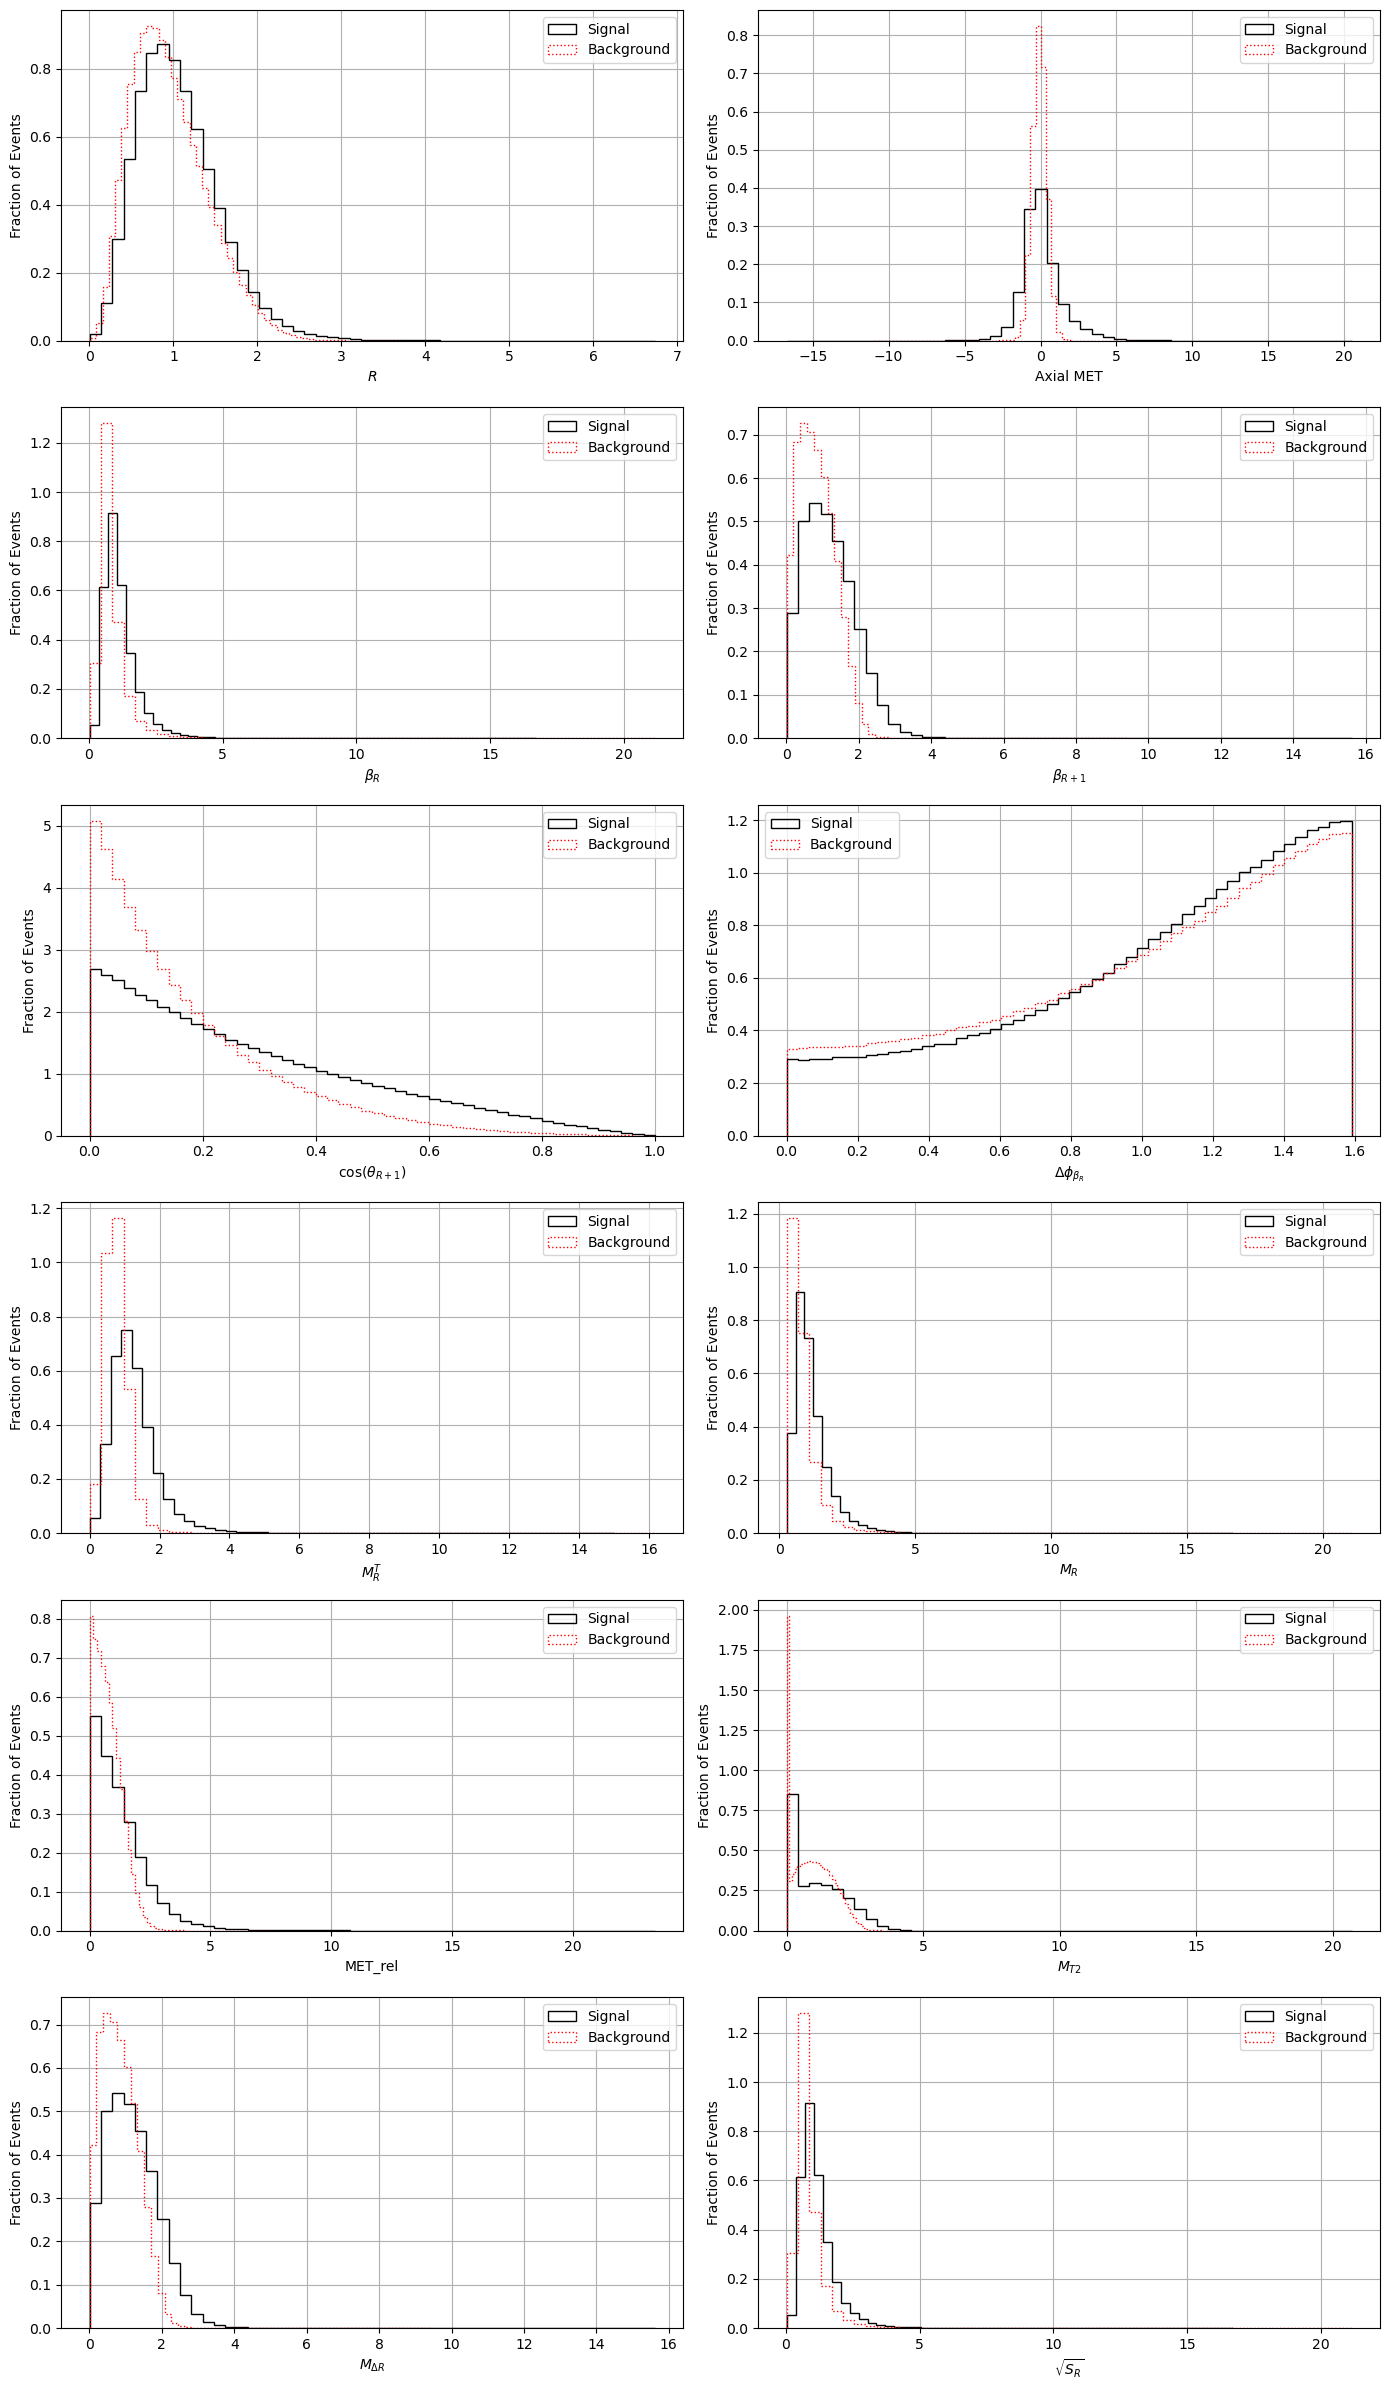

In [21]:
#### FIG 6

high_level_features = [
    "R", "axial_MET", "S_R", "M_Delta_R", "cos_theta_r1", "dPhi_r_b",
    "M_TR_2", "M_R", "MET_rel", "MT2", "M_Delta_R", "S_R"
]


plot_labels = [
    r"$R$", "Axial MET", r"$\beta_R$", r"$\beta_{R+1}$", r"$\cos(\theta_{R+1})$", r"$\Delta \phi_{\beta_R}$",
    r"$M^T_R$", r"$M_R$", "MET_rel", r"$M_{T2}$", r"$M_{\Delta R}$", r"$\sqrt{S_R}$"
]


fig, axes = plt.subplots(6, 2, figsize=(14, 24))  
axes = axes.flatten()

for i, feature in enumerate(high_level_features):
    ax = axes[i]
    ax.hist(df_sig[feature], bins=50, histtype="step", color="black", label="Signal", density=True)
    ax.hist(df_bkg[feature], bins=50, histtype="step", color="red", linestyle="dotted", label="Background", density=True)
    ax.set_xlabel(plot_labels[i])
    ax.set_ylabel("Fraction of Events")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

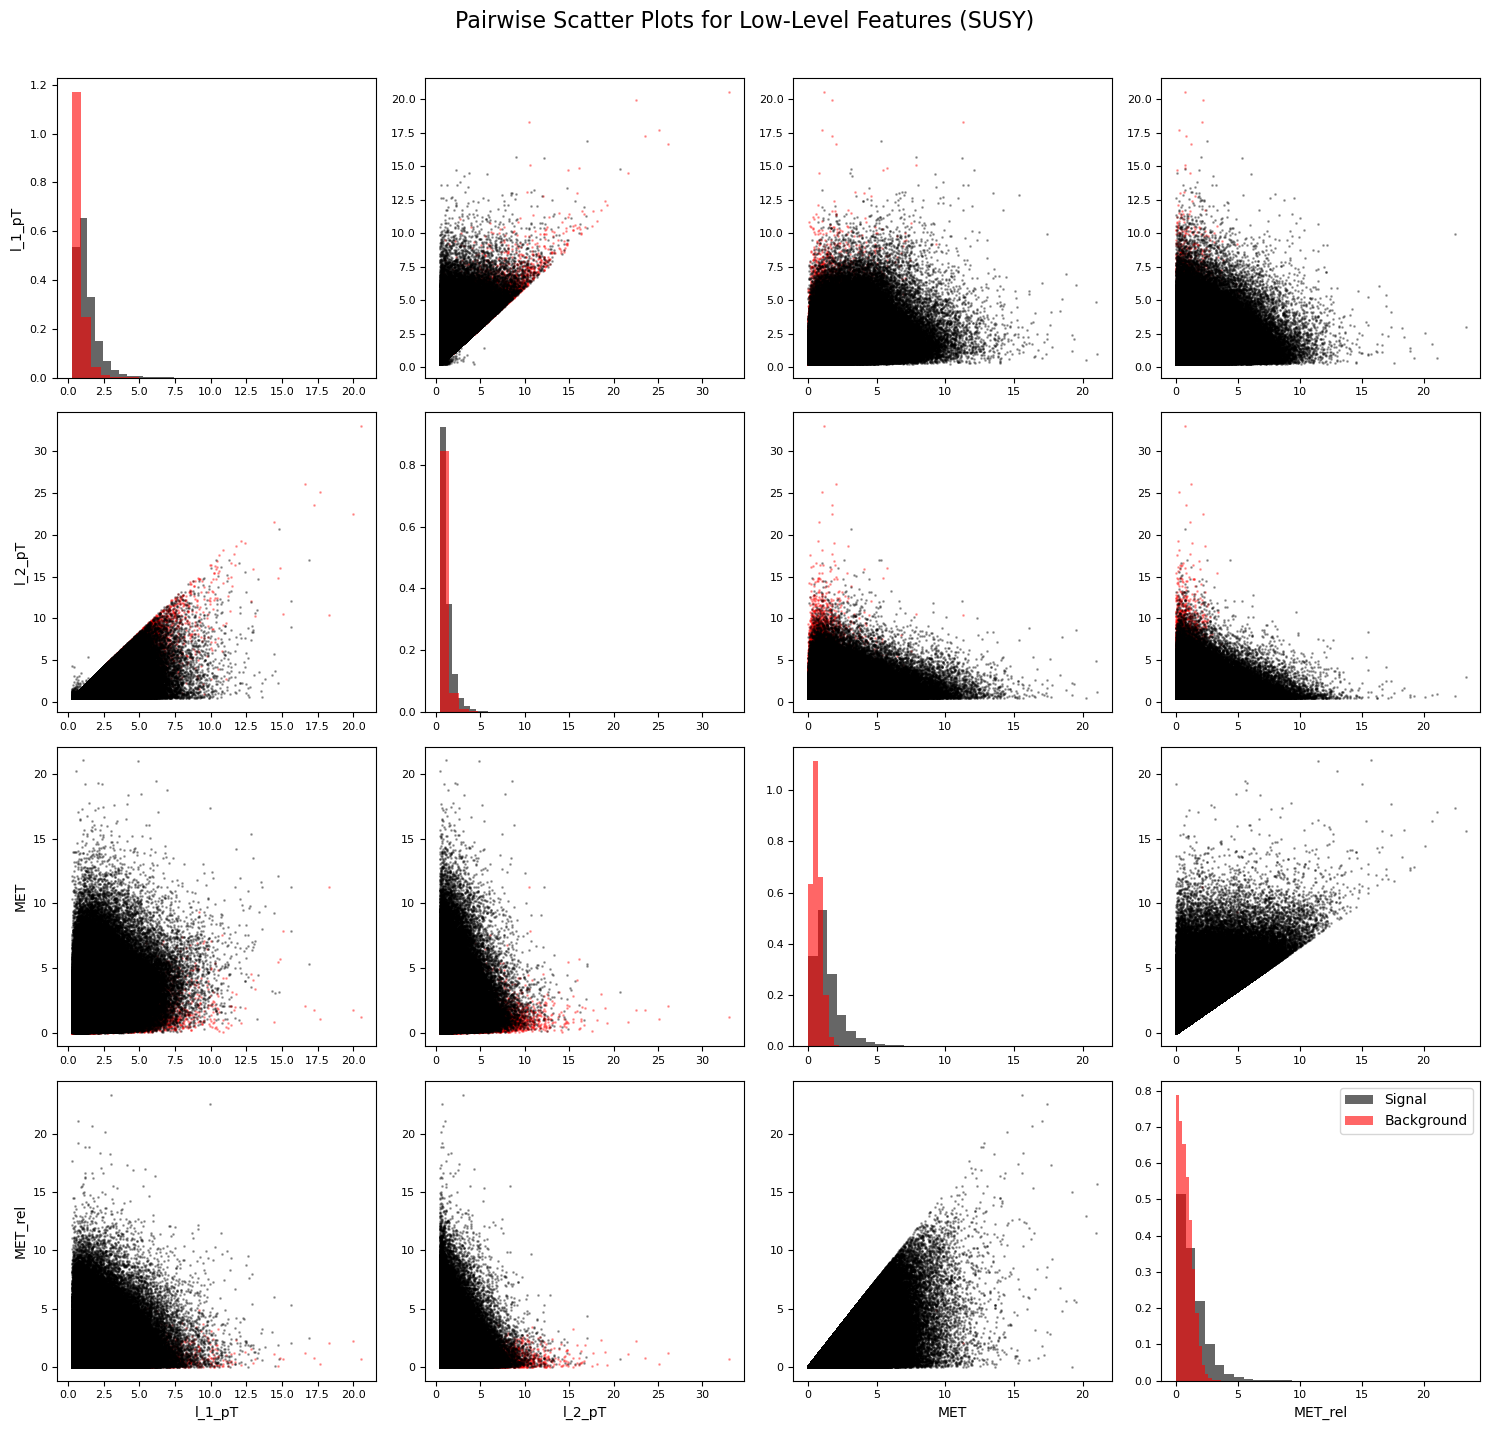

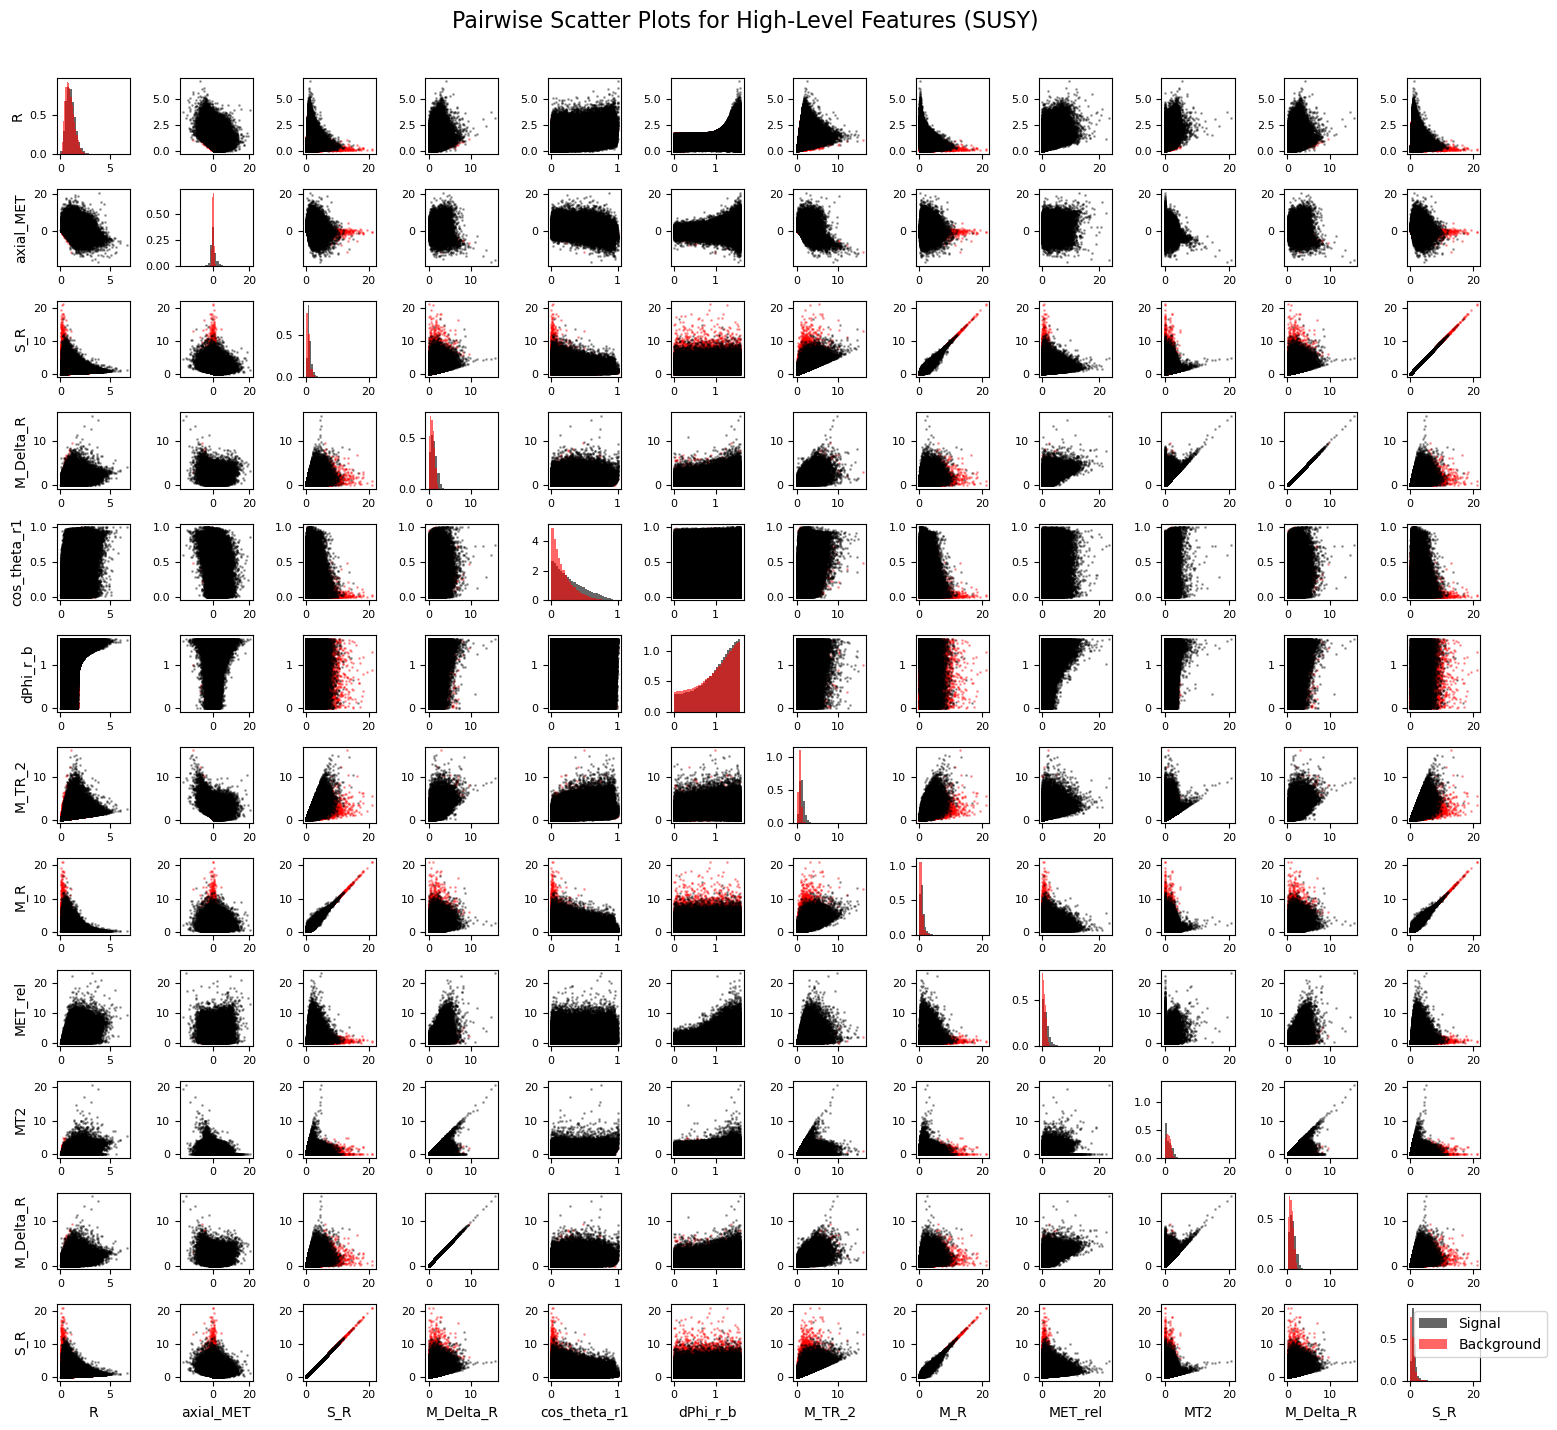

In [22]:
### Exercise 4: Correlation

#### Exercise 4.1

##### Part a

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def pair_plot_matrix(df, features, title):
    """Create pairwise scatter plots for given features."""
    num_features = len(features)
    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))
    
    # Separate signal and background
    df_sig = df[df["signal"] == 1]
    df_bkg = df[df["signal"] == 0]

    for i, feature1 in enumerate(features):
        for j, feature2 in enumerate(features):
            ax = axes[i, j]
            
            if i == j:
                # Diagonal: Histograms of each feature
                ax.hist(df_sig[feature1], bins=30, color="black", alpha=0.6, label="Signal", density=True)
                ax.hist(df_bkg[feature1], bins=30, color="red", linestyle="dotted", alpha=0.6, label="Background", density=True)
            else:
                # Off-diagonal: Scatter plots
                ax.scatter(df_bkg[feature2], df_bkg[feature1], color="red", s=1, alpha=0.3, label="Background")
                ax.scatter(df_sig[feature2], df_sig[feature1], color="black", s=1, alpha=0.3, label="Signal")

            # Labels
            if j == 0:
                ax.set_ylabel(feature1)
            if i == num_features - 1:
                ax.set_xlabel(feature2)

            ax.tick_params(axis="both", which="both", labelsize=8)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.legend()
    plt.show()




pair_plot_matrix(df, low_level_features, "Pairwise Scatter Plots for Low-Level Features (SUSY)")
pair_plot_matrix(df, high_level_features, "Pairwise Scatter Plots for High-Level Features (SUSY)")


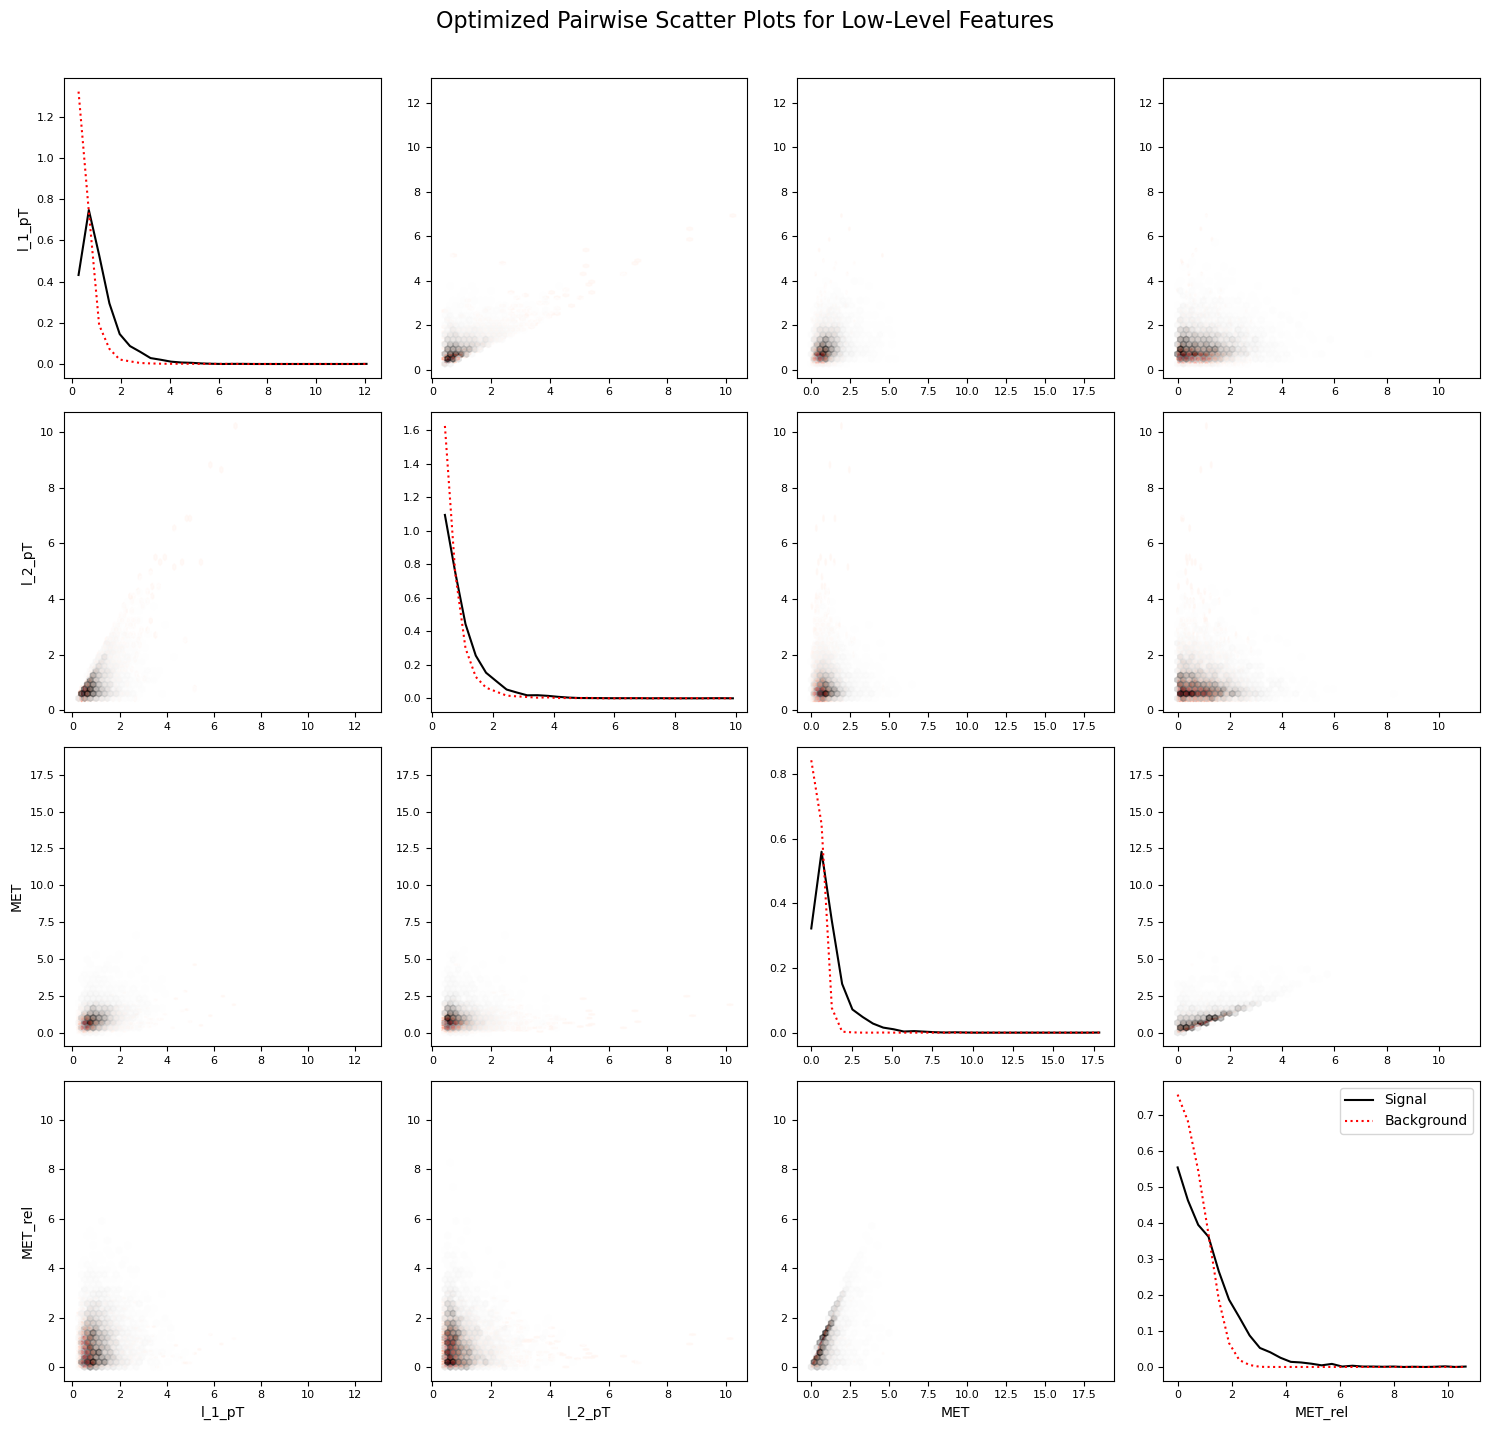

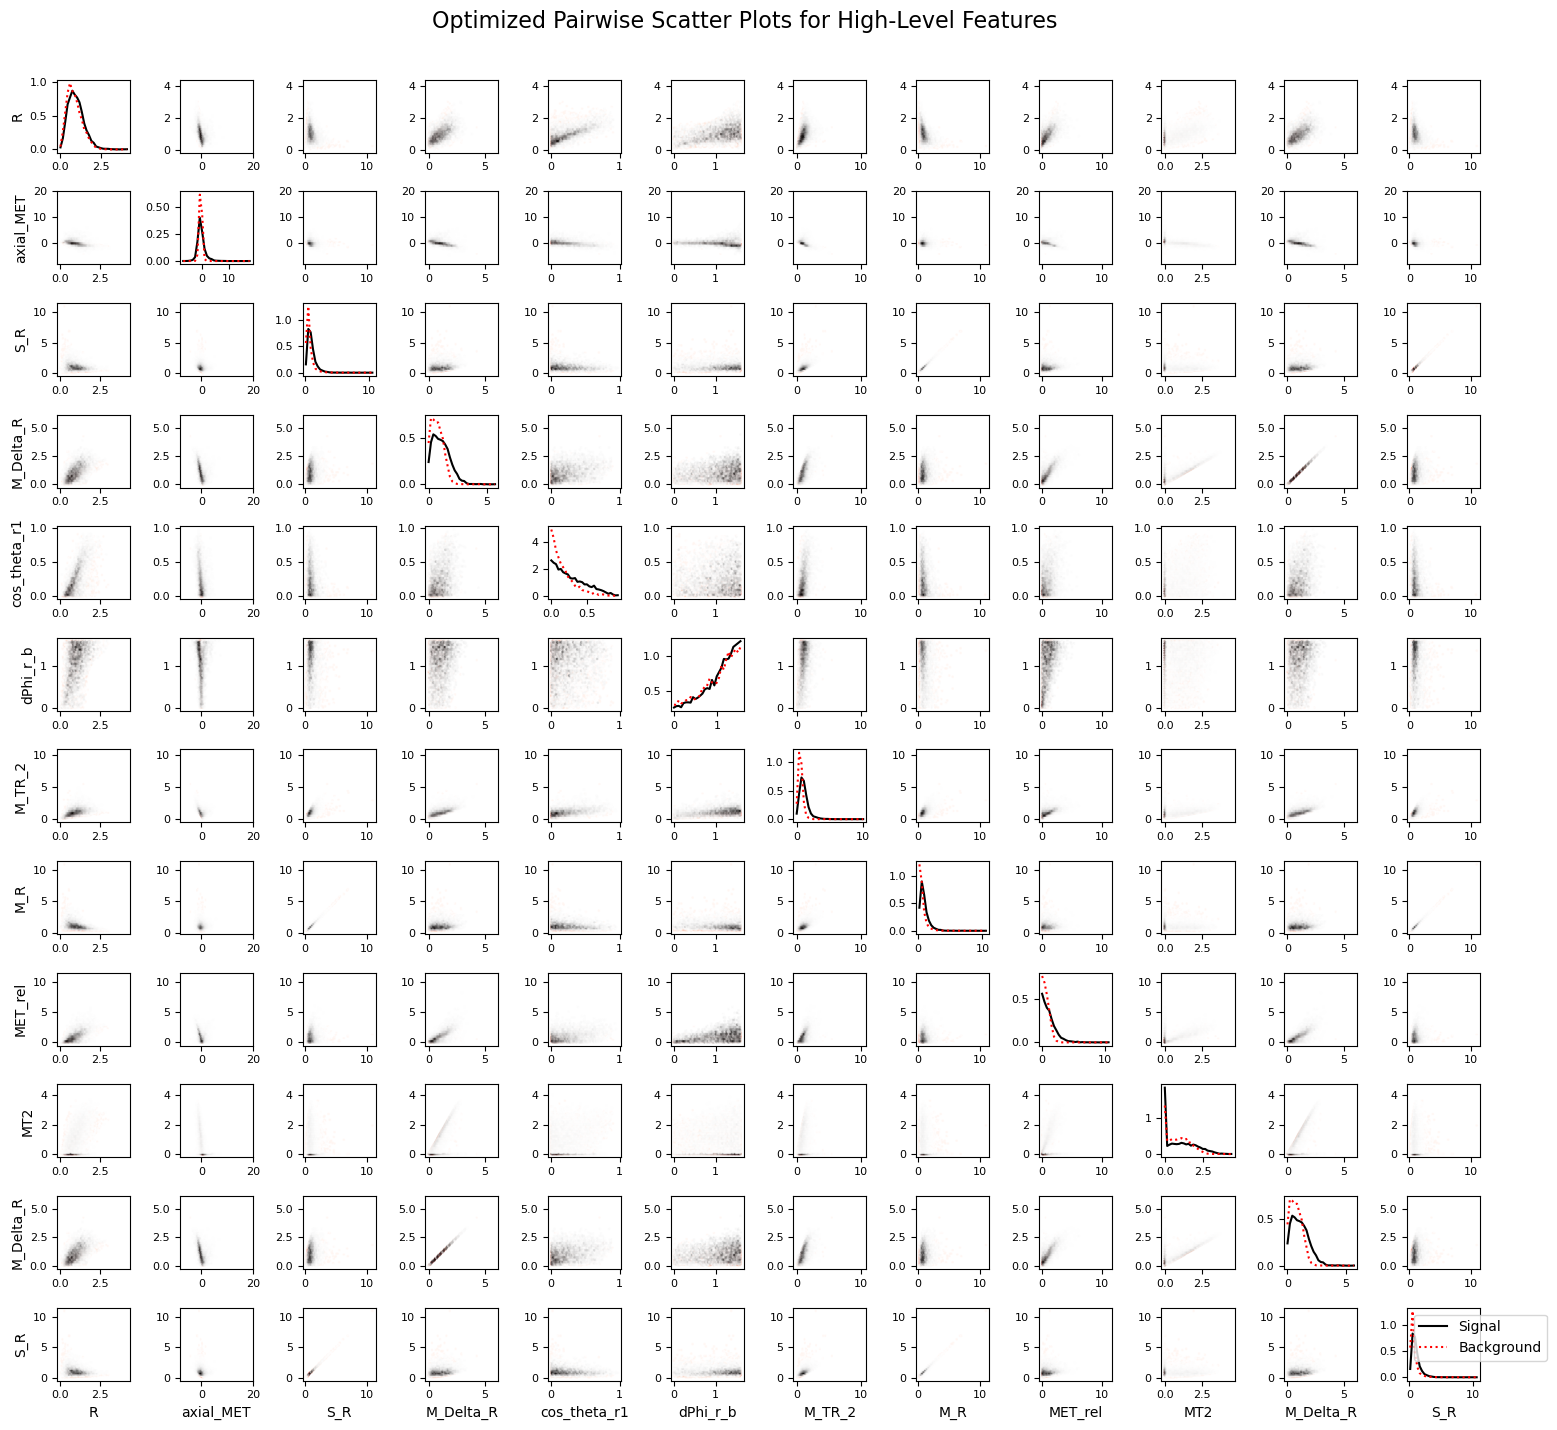

In [23]:
##### Part b

# Optimized function to create pair plots efficiently
def optimized_pair_plot_matrix(df, features, title, sample_size=10000):
    
    # Take a random sample to speed up computation
    df_sample = df.sample(n=min(sample_size, len(df)), random_state=42)

    # Separate signal and background
    df_sig = df_sample[df_sample["signal"] == 1]
    df_bkg = df_sample[df_sample["signal"] == 0]

    num_features = len(features)
    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))
    
    for i, feature1 in enumerate(features):
        for j, feature2 in enumerate(features):
            ax = axes[i, j]
            
            if i == j:
                # Diagonal: Use np.histogram for faster histograms
                bins = np.linspace(df_sample[feature1].min(), df_sample[feature1].max(), 30)
                hist_sig, _ = np.histogram(df_sig[feature1], bins=bins, density=True)
                hist_bkg, _ = np.histogram(df_bkg[feature1], bins=bins, density=True)
                
                ax.plot(bins[:-1], hist_sig, color="black", label="Signal")
                ax.plot(bins[:-1], hist_bkg, color="red", linestyle="dotted", label="Background")
            
            else:
                # Off-diagonal: Use hexbin instead of scatter for faster density visualization
                ax.hexbin(df_bkg[feature2], df_bkg[feature1], gridsize=50, cmap="Reds", mincnt=1, alpha=0.5)
                ax.hexbin(df_sig[feature2], df_sig[feature1], gridsize=50, cmap="Greys", mincnt=1, alpha=0.5)
            
            # Labels
            if j == 0:
                ax.set_ylabel(feature1)
            if i == num_features - 1:
                ax.set_xlabel(feature2)

            ax.tick_params(axis="both", which="both", labelsize=8)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.legend()
    plt.show()


optimized_pair_plot_matrix(df, low_level_features, "Optimized Pairwise Scatter Plots for Low-Level Features")
optimized_pair_plot_matrix(df, high_level_features, "Optimized Pairwise Scatter Plots for High-Level Features")


##### Part c

"" Which observables appear to be best for separating signal from background?: MET_rel, cos_theta_r1, M_Delta_R """"


In [25]:
####Exercise 4.2

##### Part a

!pip install tabulate


In [26]:
import tabulate
print("Tabulate installed successfully!")

Tabulate installed successfully!


In [27]:
##### Part b

# Compute covariance and correlation matrices for all features
cov_matrix_all = np.cov(df[VarNames[1:]].values, rowvar=False)
corr_matrix_all = np.corrcoef(df[VarNames[1:]].values, rowvar=False)

# Compute covariance and correlation matrices for low-level features
cov_matrix_low = np.cov(df[low_level_features].values, rowvar=False)
corr_matrix_low = np.corrcoef(df[low_level_features].values, rowvar=False)

# Compute covariance and correlation matrices for high-level features
cov_matrix_high = np.cov(df[high_level_features].values, rowvar=False)
corr_matrix_high = np.corrcoef(df[high_level_features].values, rowvar=False)

# Convert results to DataFrames for better visualization
cov_df_all = pd.DataFrame(cov_matrix_all, index=VarNames[1:], columns=VarNames[1:])
corr_df_all = pd.DataFrame(corr_matrix_all, index=VarNames[1:], columns=VarNames[1:])

cov_df_low = pd.DataFrame(cov_matrix_low, index=low_level_features, columns=low_level_features)
corr_df_low = pd.DataFrame(corr_matrix_low, index=low_level_features, columns=low_level_features)

cov_df_high = pd.DataFrame(cov_matrix_high, index=high_level_features, columns=high_level_features)
corr_df_high = pd.DataFrame(corr_matrix_high, index=high_level_features, columns=high_level_features)

# Print the results
print("Covariance Matrix (All Features):\n", cov_df_all, "\n")
print("Correlation Matrix (All Features):\n", corr_df_all, "\n")
print("Covariance Matrix (Low-Level Features):\n", cov_df_low, "\n")
print("Correlation Matrix (Low-Level Features):\n", corr_df_low, "\n")
print("Covariance Matrix (High-Level Features):\n", cov_df_high, "\n")
print("Correlation Matrix (High-Level Features):\n", corr_df_high, "\n")

Covariance Matrix (All Features):
                 l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
l_1_pT        0.472428 -0.000263 -0.000229  0.307887 -0.000302  0.000227   
l_1_eta      -0.000263  1.006224  0.000322 -0.000378  0.405877  0.000297   
l_1_phi      -0.000229  0.000322  1.003342 -0.000129  0.000641 -0.268130   
l_2_pT        0.307887 -0.000378 -0.000129  0.428004 -0.000454  0.000115   
l_2_eta      -0.000302  0.405877  0.000641 -0.000454  1.005686 -0.000065   
l_2_phi       0.000227  0.000297 -0.268130  0.000115 -0.000065  1.003265   
MET           0.230951 -0.000558  0.001200  0.079704  0.000051  0.000004   
MET_phi      -0.000676 -0.000541 -0.184184 -0.001388 -0.000126 -0.034468   
MET_rel       0.098567 -0.000497  0.001529 -0.002259  0.000130  0.000214   
axial_MET    -0.012512 -0.000498 -0.001965  0.049797 -0.000170 -0.000091   
M_R           0.368085 -0.000308 -0.000200  0.328115 -0.000549  0.000287   
M_TR_2        0.290831 -0.000266  0.000838  0.164385 

In [28]:
cov_df_all

l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
l_1_pT        0.472428 -0.000263 -0.000229  0.307887 -0.000302  0.000227   
l_1_eta      -0.000263  1.006224  0.000322 -0.000378  0.405877  0.000297   
l_1_phi      -0.000229  0.000322  1.003342 -0.000129  0.000641 -0.268130   
l_2_pT        0.307887 -0.000378 -0.000129  0.428004 -0.000454  0.000115   
l_2_eta      -0.000302  0.405877  0.000641 -0.000454  1.005686 -0.000065   
l_2_phi       0.000227  0.000297 -0.268130  0.000115 -0.000065  1.003265   
MET           0.230951 -0.000558  0.001200  0.079704  0.000051  0.000004   
MET_phi      -0.000676 -0.000541 -0.184184 -0.001388 -0.000126 -0.034468   
MET_rel       0.098567 -0.000497  0.001529 -0.002259  0.000130  0.000214   
axial_MET    -0.012512 -0.000498 -0.001965  0.049797 -0.000170 -0.000091   
M_R           0.368085 -0.000308 -0.000200  0.328115 -0.000549  0.000287   
M_TR_2        0.290831 -0.000266  0.000838  0.164385 -0.000167  0.000288   
R            -0.059285  0.000128  0.000876 -0.099316  0.000253  0.000235   
MT2          -0.012778 -0.000158  0.001754 -0.069139 -0.000091  0.001244   
S_R           0.346283 -0.000281  0.000045  0.324622 -0.000554  0.000384   
M_Delta_R     0.098083 -0.000504  0.001312  0.005552 -0.000215  0.000496   
dPhi_r_b     -0.047023  0.000080  0.000954 -0.004118 -0.000052  0.000244   
cos_theta_r1  0.022517  0.000146  0.000299 -0.027796  0.000199 -0.000199   

                   MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2  \
l_1_pT        0.230951 -0.000676  0.098567  -0.012512  0.368085  0.290831   
l_1_eta      -0.000558 -0.000541 -0.000497  -0.000498 -0.000308 -0.000266   
l_1_phi       0.001200 -0.184184  0.001529  -0.001965 -0.000200  0.000838   
l_2_pT        0.079704 -0.001388 -0.002259   0.049797  0.328115  0.164385   
l_2_eta       0.000051 -0.000126  0.000130  -0.000170 -0.000549 -0.000167   
l_2_phi       0.000004 -0.034468  0.000214  -0.000091  0.000287  0.000288   
MET           0.761933 -0.001622  0.548358   0.144805  0.145918  0.368099   
MET_phi      -0.001622  1.003311 -0.002920  -0.000953 -0.000976 -0.000842   
MET_rel       0.548358 -0.002920  0.792397  -0.125273  0.043706  0.303346   
axial_MET     0.144805 -0.000953 -0.125273   1.003190  0.015105 -0.188739   
M_R           0.145918 -0.000976  0.043706   0.015105  0.395446  0.212154   
M_TR_2        0.368099 -0.000842  0.303346  -0.188739  0.212154  0.341189   
R             0.188550 -0.000163  0.249511  -0.181640 -0.112922  0.104464   
MT2           0.156388  0.000505  0.410022  -0.460312 -0.036623  0.189498   
S_R           0.167330 -0.001141  0.082417  -0.043417  0.383059  0.230448   
M_Delta_R     0.316608 -0.000399  0.415675  -0.234103  0.074278  0.242487   
dPhi_r_b      0.145279 -0.001323  0.146597  -0.026209 -0.029132  0.058133   
cos_theta_r1  0.073258  0.000058  0.055605  -0.054126 -0.014194  0.051946   

                     R       MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
l_1_pT       -0.059285 -0.012778  0.346283   0.098083 -0.047023      0.022517  
l_1_eta       0.000128 -0.000158 -0.000281  -0.000504  0.000080      0.000146  
l_1_phi       0.000876  0.001754  0.000045   0.001312  0.000954      0.000299  
l_2_pT       -0.099316 -0.069139  0.324622   0.005552 -0.004118     -0.027796  
l_2_eta       0.000253 -0.000091 -0.000554  -0.000215 -0.000052      0.000199  
l_2_phi       0.000235  0.001244  0.000384   0.000496  0.000244     -0.000199  
MET           0.188550  0.156388  0.167330   0.316608  0.145279      0.073258  
MET_phi      -0.000163  0.000505 -0.001141  -0.000399 -0.001323      0.000058  
MET_rel       0.249511  0.410022  0.082417   0.415675  0.146597      0.055605  
axial_MET    -0.181640 -0.460312 -0.043417  -0.234103 -0.026209     -0.054126  
M_R          -0.112922 -0.036623  0.383059   0.074278 -0.029132     -0.014194  
M_TR_2        0.104464  0.189498  0.230448   0.242487  0.058133      0.051946  
R             0.221691  0.232203 -0.083428   0.165647  0.087129    

In [29]:
corr_df_all

l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
l_1_pT        1.000000 -0.000381 -0.000333  0.684700 -0.000439  0.000330   
l_1_eta      -0.000381  1.000000  0.000320 -0.000576  0.403475  0.000296   
l_1_phi      -0.000333  0.000320  1.000000 -0.000196  0.000638 -0.267247   
l_2_pT        0.684700 -0.000576 -0.000196  1.000000 -0.000692  0.000175   
l_2_eta      -0.000439  0.403475  0.000638 -0.000692  1.000000 -0.000064   
l_2_phi       0.000330  0.000296 -0.267247  0.000175 -0.000064  1.000000   
MET           0.384940 -0.000637  0.001373  0.139572  0.000058  0.000005   
MET_phi      -0.000982 -0.000538 -0.183573 -0.002118 -0.000125 -0.034355   
MET_rel       0.161098 -0.000556  0.001715 -0.003879  0.000145  0.000240   
axial_MET    -0.018174 -0.000495 -0.001958  0.075996 -0.000169 -0.000091   
M_R           0.851602 -0.000488 -0.000317  0.797551 -0.000870  0.000455   
M_TR_2        0.724394 -0.000454  0.001432  0.430171 -0.000285  0.000492   
R            -0.183190  0.000270  0.001858 -0.322419  0.000537  0.000498   
MT2          -0.021636 -0.000183  0.002038 -0.122992 -0.000105  0.001445   
S_R           0.811653 -0.000452  0.000072  0.799394 -0.000889  0.000617   
M_Delta_R     0.228773 -0.000806  0.002100  0.013606 -0.000343  0.000794   
dPhi_r_b     -0.156878  0.000182  0.002183 -0.014432 -0.000118  0.000558   
cos_theta_r1  0.166311  0.000738  0.001518 -0.215695  0.001006 -0.001007   

                   MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2  \
l_1_pT        0.384940 -0.000982  0.161098  -0.018174  0.851602  0.724394   
l_1_eta      -0.000637 -0.000538 -0.000556  -0.000495 -0.000488 -0.000454   
l_1_phi       0.001373 -0.183573  0.001715  -0.001958 -0.000317  0.001432   
l_2_pT        0.139572 -0.002118 -0.003879   0.075996  0.797551  0.430171   
l_2_eta       0.000058 -0.000125  0.000145  -0.000169 -0.000870 -0.000285   
l_2_phi       0.000005 -0.034355  0.000240  -0.000091  0.000455  0.000492   
MET           1.000000 -0.001855  0.705724   0.165628  0.265832  0.721952   
MET_phi      -0.001855  1.000000 -0.003274  -0.000950 -0.001549 -0.001439   
MET_rel       0.705724 -0.003274  1.000000  -0.140506  0.078078  0.583403   
axial_MET     0.165628 -0.000950 -0.140506   1.000000  0.023981 -0.322606   
M_R           0.265832 -0.001549  0.078078   0.023981  1.000000  0.577579   
M_TR_2        0.721952 -0.001439  0.583403  -0.322606  0.577579  1.000000   
R             0.458770 -0.000346  0.595311  -0.385164 -0.381384  0.379836   
MT2           0.208510  0.000587  0.536064  -0.534862 -0.067779  0.377562   
S_R           0.308832 -0.001835  0.149160  -0.069836  0.981360  0.635598   
M_Delta_R     0.581489 -0.000638  0.748617  -0.374708  0.189362  0.665531   
dPhi_r_b      0.381648 -0.003029  0.377634  -0.060004 -0.106231  0.228214   
cos_theta_r1  0.426065  0.000293  0.317117  -0.274339 -0.114588  0.451471   

                     R       MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
l_1_pT       -0.183190 -0.021636  0.811653   0.228773 -0.156878      0.166311  
l_1_eta       0.000270 -0.000183 -0.000452  -0.000806  0.000182      0.000738  
l_1_phi       0.001858  0.002038  0.000072   0.002100  0.002183      0.001518  
l_2_pT       -0.322419 -0.122992  0.799394   0.013606 -0.014432     -0.215695  
l_2_eta       0.000537 -0.000105 -0.000889  -0.000343 -0.000118      0.001006  
l_2_phi       0.000498  0.001445  0.000617   0.000794  0.000558     -0.001007  
MET           0.458770  0.208510  0.308832   0.581489  0.381648      0.426065  
MET_phi      -0.000346  0.000587 -0.001835  -0.000638 -0.003029      0.000293  
MET_rel       0.595311  0.536064  0.149160   0.748617  0.377634      0.317117  
axial_MET    -0.385164 -0.534862 -0.069836  -0.374708 -0.060004     -0.274339  
M_R          -0.381384 -0.067779  0.981360   0.189362 -0.106231     -0.114588  
M_TR_2        0.379836  0.377562  0.635598   0.665531  0.228214      0.451471  
R             1.000000  0.573951 -0.285461   0.564009  0.424334    

In [30]:
cov_df_low

l_1_pT    l_2_pT       MET   MET_rel
l_1_pT   0.472428  0.307887  0.230951  0.098567
l_2_pT   0.307887  0.428004  0.079704 -0.002259
MET      0.230951  0.079704  0.761933  0.548358
MET_rel  0.098567 -0.002259  0.548358  0.792397

In [31]:
corr_df_low

l_1_pT    l_2_pT       MET   MET_rel
l_1_pT   1.000000  0.684700  0.384940  0.161098
l_2_pT   0.684700  1.000000  0.139572 -0.003879
MET      0.384940  0.139572  1.000000  0.705724
MET_rel  0.161098 -0.003879  0.705724  1.000000

In [32]:
cov_df_high

R  axial_MET       S_R  M_Delta_R  cos_theta_r1  \
R             0.221691  -0.181640 -0.083428   0.165647      0.058179   
axial_MET    -0.181640   1.003190 -0.043417  -0.234103     -0.054126   
S_R          -0.083428  -0.043417  0.385289   0.096144     -0.010223   
M_Delta_R     0.165647  -0.234103  0.096144   0.389086      0.039200   
cos_theta_r1  0.058179  -0.054126 -0.010223   0.039200      0.038801   
dPhi_r_b      0.087129  -0.026209 -0.003632   0.042386      0.009129   
M_TR_2        0.104464  -0.188739  0.230448   0.242487      0.051946   
M_R          -0.112922   0.015105  0.383059   0.074278     -0.014194   
MET_rel       0.249511  -0.125273  0.082417   0.415675      0.055605   
MT2           0.232203  -0.460312 -0.011166   0.433327      0.044530   
M_Delta_R     0.165647  -0.234103  0.096144   0.389086      0.039200   
S_R          -0.083428  -0.043417  0.385289   0.096144     -0.010223   

              dPhi_r_b    M_TR_2       M_R   MET_rel       MT2  M_Delta_R  \
R             0.087129  0.104464 -0.112922  0.249511  0.232203   0.165647   
axial_MET    -0.026209 -0.188739  0.015105 -0.125273 -0.460312  -0.234103   
S_R          -0.003632  0.230448  0.383059  0.082417 -0.011166   0.096144   
M_Delta_R     0.042386  0.242487  0.074278  0.415675  0.433327   0.389086   
cos_theta_r1  0.009129  0.051946 -0.014194  0.055605  0.044530   0.039200   
dPhi_r_b      0.190179  0.058133 -0.029132  0.146597  0.021170   0.042386   
M_TR_2        0.058133  0.341189  0.212154  0.303346  0.189498   0.242487   
M_R          -0.029132  0.212154  0.395446  0.043706 -0.036623   0.074278   
MET_rel       0.146597  0.303346  0.043706  0.792397  0.410022   0.415675   
MT2           0.021170  0.189498 -0.036623  0.410022  0.738309   0.433327   
M_Delta_R     0.042386  0.242487  0.074278  0.415675  0.433327   0.389086   
S_R          -0.003632  0.230448  0.383059  0.082417 -0.011166   0.096144   

                   S_R  
R            -0.083428  
axial_MET    -0.043417  
S_R           0.385289  
M_Delta_R     0.096144  
cos_theta_r1 -0.010223  
dPhi_r_b     -0.003632  
M_TR_2        0.230448  
M_R           0.383059  
MET_rel       0.082417  
MT2          -0.011166  
M_Delta_R     0.096144  
S_R           0.385289

In [33]:
corr_df_high

R  axial_MET       S_R  M_Delta_R  cos_theta_r1  \
R             1.000000  -0.385164 -0.285461   0.564009      0.627296   
axial_MET    -0.385164   1.000000 -0.069836  -0.374708     -0.274339   
S_R          -0.285461  -0.069836  1.000000   0.248317     -0.083611   
M_Delta_R     0.564009  -0.374708  0.248317   1.000000      0.319037   
cos_theta_r1  0.627296  -0.274339 -0.083611   0.319037      1.000000   
dPhi_r_b      0.424334  -0.060004 -0.013416   0.155819      0.106269   
M_TR_2        0.379836  -0.322606  0.635598   0.665531      0.451471   
M_R          -0.381384   0.023981  0.981360   0.189362     -0.114588   
MET_rel       0.595311  -0.140506  0.149160   0.748617      0.317117   
MT2           0.573951  -0.534862 -0.020935   0.808488      0.263091   
M_Delta_R     0.564009  -0.374708  0.248317   1.000000      0.319037   
S_R          -0.285461  -0.069836  1.000000   0.248317     -0.083611   

              dPhi_r_b    M_TR_2       M_R   MET_rel       MT2  M_Delta_R  \
R             0.424334  0.379836 -0.381384  0.595311  0.573951   0.564009   
axial_MET    -0.060004 -0.322606  0.023981 -0.140506 -0.534862  -0.374708   
S_R          -0.013416  0.635598  0.981360  0.149160 -0.020935   0.248317   
M_Delta_R     0.155819  0.665531  0.189362  0.748617  0.808488   1.000000   
cos_theta_r1  0.106269  0.451471 -0.114588  0.317117  0.263091   0.319037   
dPhi_r_b      1.000000  0.228214 -0.106231  0.377634  0.056497   0.155819   
M_TR_2        0.228214  1.000000  0.577579  0.583403  0.377562   0.665531   
M_R          -0.106231  0.577579  1.000000  0.078078 -0.067779   0.189362   
MET_rel       0.377634  0.583403  0.078078  1.000000  0.536064   0.748617   
MT2           0.056497  0.377562 -0.067779  0.536064  1.000000   0.808488   
M_Delta_R     0.155819  0.665531  0.189362  0.748617  0.808488   1.000000   
S_R          -0.013416  0.635598  0.981360  0.149160 -0.020935   0.248317   

                   S_R  
R            -0.285461  
axial_MET    -0.069836  
S_R           1.000000  
M_Delta_R     0.248317  
cos_theta_r1 -0.083611  
dPhi_r_b     -0.013416  
M_TR_2        0.635598  
M_R           0.981360  
MET_rel       0.149160  
MT2          -0.020935  
M_Delta_R     0.248317  
S_R           1.000000

In [34]:
##### Part c

from IPython.display import HTML, display
import tabulate

# Function to format tables using tabulate for HTML display
def format_table_html(df, decimals=3):
    """Formats a dataframe into an HTML table using tabulate."""
    return tabulate.tabulate(df.round(decimals), headers='keys', tablefmt='html')

# Format the covariance and correlation matrices as HTML tables
cov_table_all_html = format_table_html(cov_df_all)
corr_table_all_html = format_table_html(corr_df_all)
cov_table_low_html = format_table_html(cov_df_low)
corr_table_low_html = format_table_html(corr_df_low)
cov_table_high_html = format_table_html(cov_df_high)
corr_table_high_html = format_table_html(corr_df_high)

# Display the tables in the notebook
display(HTML("<h3>Covariance Matrix (All Features)</h3>" + cov_table_all_html))
display(HTML("<h3>Correlation Matrix (All Features)</h3>" + corr_table_all_html))
display(HTML("<h3>Covariance Matrix (Low-Level Features)</h3>" + cov_table_low_html))
display(HTML("<h3>Correlation Matrix (Low-Level Features)</h3>" + corr_table_low_html))
display(HTML("<h3>Covariance Matrix (High-Level Features)</h3>" + cov_table_high_html))
display(HTML("<h3>Correlation Matrix (High-Level Features)</h3>" + corr_table_high_html))


In [35]:
##### Part d

import numpy as np
import pandas as pd
import tabulate
from IPython.display import HTML, display

def compute_and_display_matrices(df, feature_set=None, decimals=3):

    if feature_set is None:
        feature_set = df.select_dtypes(include=[np.number]).columns.tolist()

    # Compute covariance and correlation matrices
    cov_matrix = np.cov(df[feature_set].values, rowvar=False)
    corr_matrix = np.corrcoef(df[feature_set].values, rowvar=False)

    # Convert to DataFrame
    cov_df = pd.DataFrame(cov_matrix, index=feature_set, columns=feature_set)
    corr_df = pd.DataFrame(corr_matrix, index=feature_set, columns=feature_set)

    # Format matrices using tabulate correctly
    def format_table_html(df):
        return tabulate.tabulate(df.round(decimals), headers='keys', tablefmt='html')

    # Create formatted tables
    cov_table_html = format_table_html(cov_df)
    corr_table_html = format_table_html(corr_df)

    # Display tables in the notebook
    display(HTML(f"<h3>Covariance Matrix</h3>{cov_table_html}"))
    display(HTML(f"<h3>Correlation Matrix</h3>{corr_table_html}"))





In [36]:
compute_and_display_matrices(df)

In [37]:
low_level_features = ["l_1_pT", "l_2_pT", "MET", "MET_rel"]
compute_and_display_matrices(df, feature_set=low_level_features)

In [38]:
high_level_features = ["R", "axial_MET", "S_R", "M_Delta_R", "cos_theta_r1", "dPhi_r_b",
    "M_TR_2", "M_R", "MET_rel", "MT2", "M_Delta_R", "S_R"]
compute_and_display_matrices(df, feature_set=high_level_features)

## Part 2
## Exercise 5: Selection

### Exercise 5.1

Most observables show that signal events are more prominent at higher values than background events. For example:

- For `l_1_pT` and `l_2_pT`, signal distributions are clearly skewed toward higher transverse momenta. So, the best cut would be `x > x_c`, where \( x_c \) is a chosen threshold.
- The same logic applies to `MET` and `MET_rel`. Since signal events tend to have more missing transverse energy, the optimal selection is again `x > x_c`.
- Observables like `M_R`, `M_TR_2`,`R`, and `S_R` also show signal distributions shifted to the right compared to background. This means signal is more likely to be found at higher values, so `x > x_c` is still the best choice.

However, for angular observables like `cos_theta_r1` and `dPhi_r_b`, signal distributions tend to be more concentrated around a central value, while background is more spread out. In such cases, a better approach may be `|x - mu| < x_c`, where we keep values close to the mean and remove the tails.

Overall, the best selection criteria for most observables is `x > x_c`, meaning signal events are more likely to be found at higher values of the variable. A few exceptions exist for symmetrical or angular variables, where central selections** like `|x - mu| < x_c` are more appropriate.


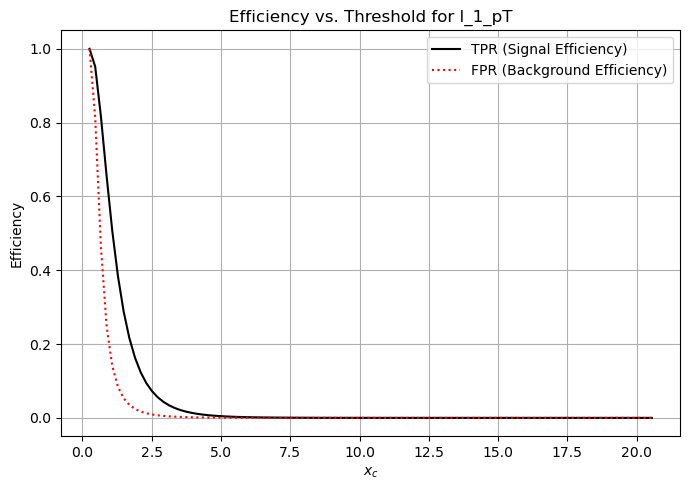

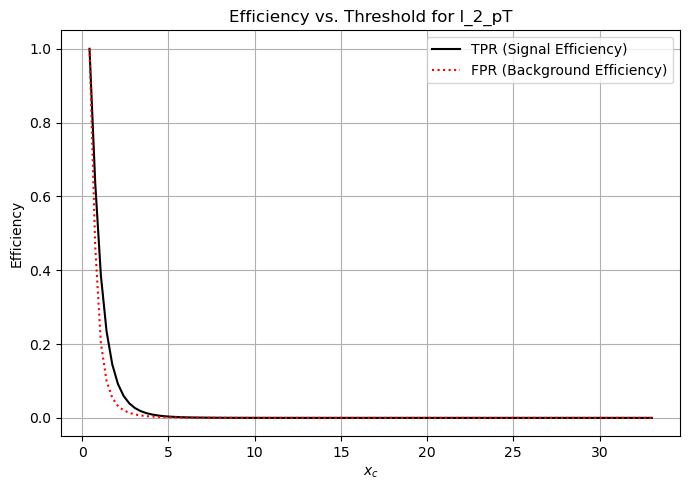

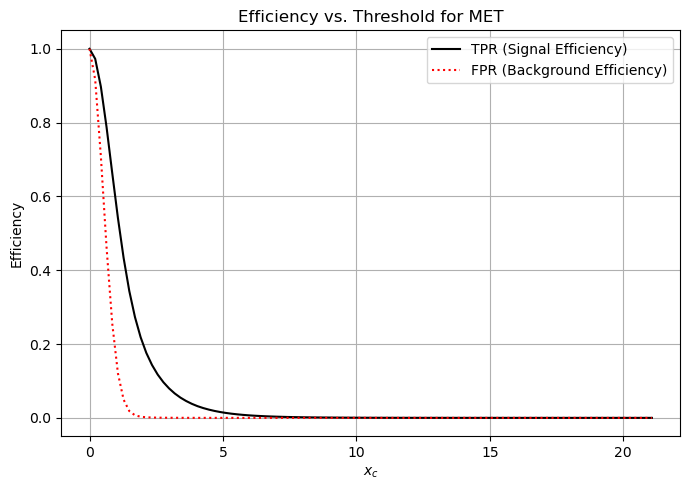

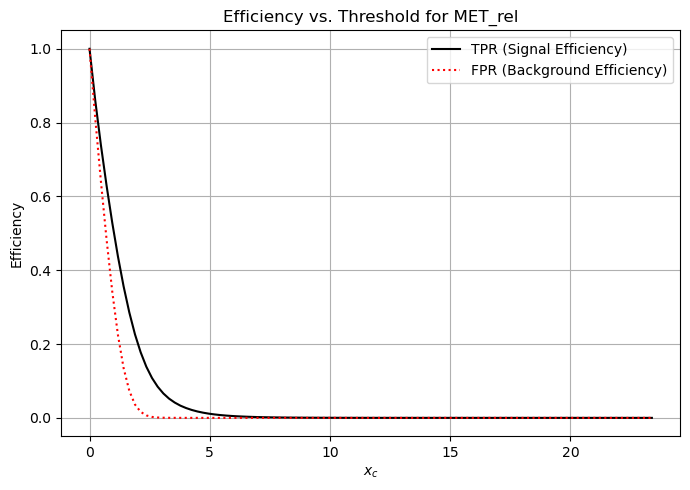

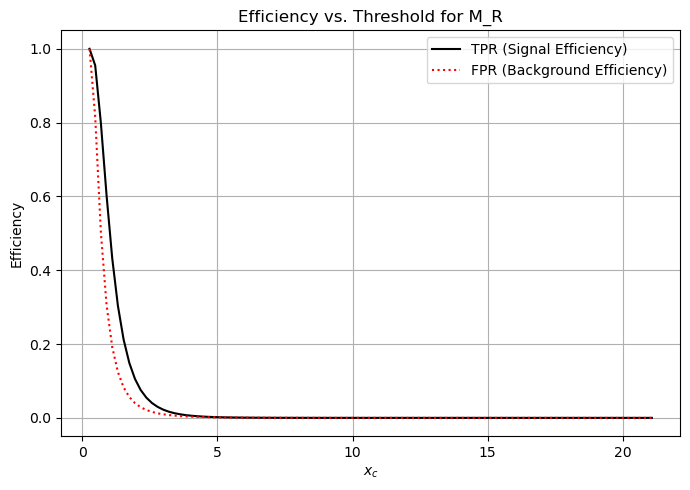

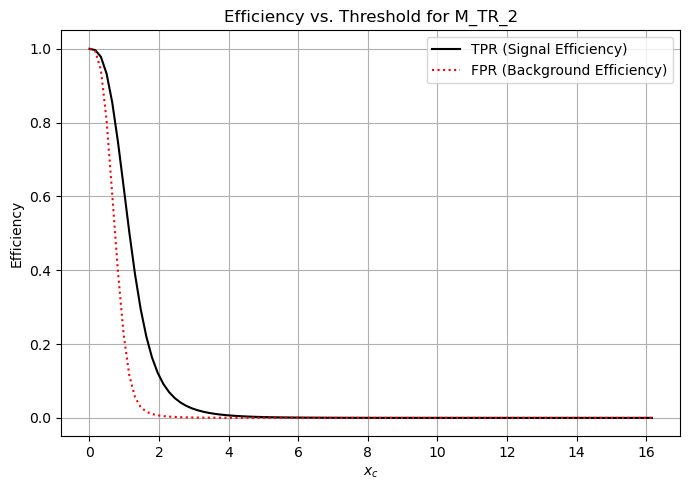

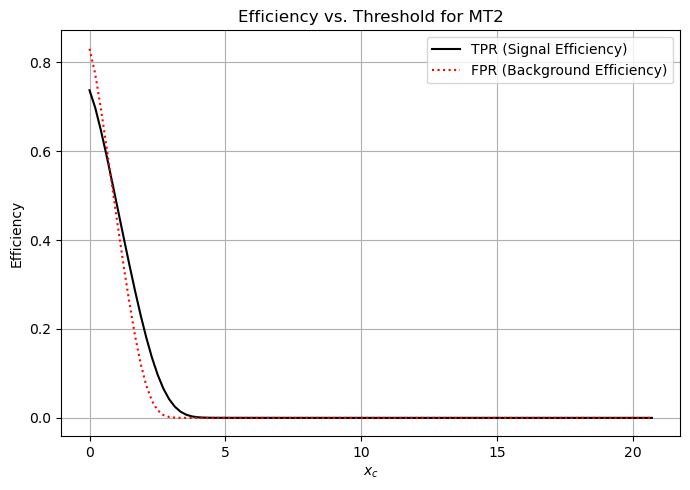

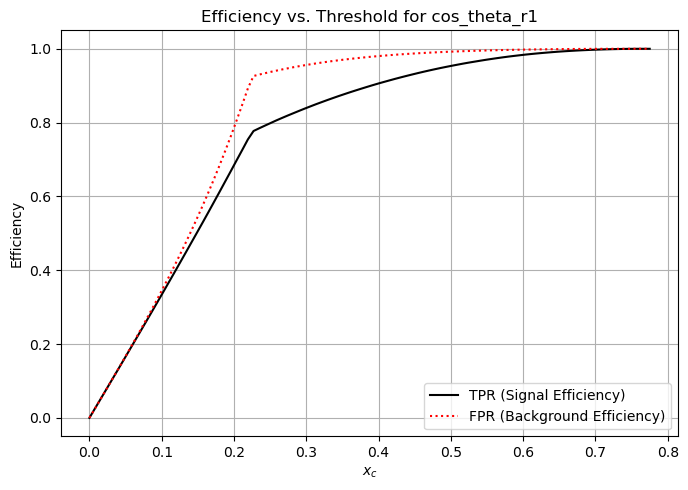

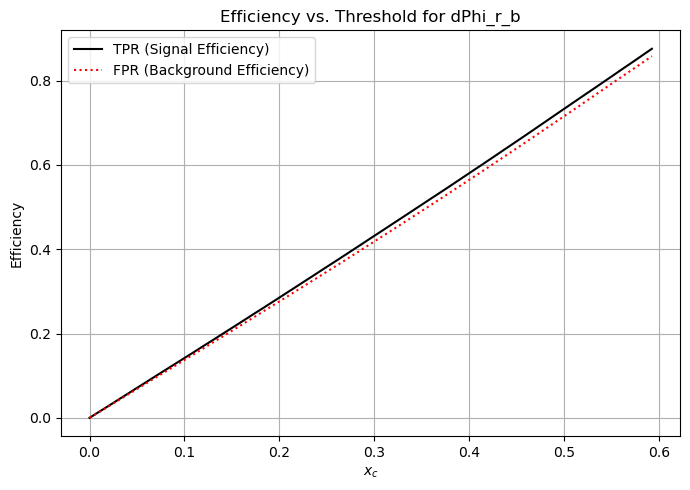

In [40]:
## Exercise 5.2

VarNames = [
    "signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
    "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2",
    "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"
]

# Separate signal and background
df_sig = df[df["signal"] == 1]
df_bkg = df[df["signal"] == 0]

# Define selection rules for each variable
selection_rules = {
    "l_1_pT": "greater",
    "l_2_pT": "greater",
    "MET": "greater",
    "MET_rel": "greater",
    "M_R": "greater",
    "M_TR_2": "greater",
    "MT2": "greater",
    "cos_theta_r1": "center",
    "dPhi_r_b": "center"
}

# Plot TPR and FPR vs threshold x_c for each observable
for var, rule in selection_rules.items():
    tpr_list = []
    fpr_list = []

    if rule == "greater":
        thresholds = np.linspace(df[var].min(), df[var].max(), 100)
        for x_c in thresholds:
            tpr = np.mean(df_sig[var] > x_c)
            fpr = np.mean(df_bkg[var] > x_c)
            tpr_list.append(tpr)
            fpr_list.append(fpr)

    elif rule == "center":
        mu = df[var].mean()
        thresholds = np.linspace(0, df[var].max() - mu, 100)
        for x_c in thresholds:
            tpr = np.mean(np.abs(df_sig[var] - mu) < x_c)
            fpr = np.mean(np.abs(df_bkg[var] - mu) < x_c)
            tpr_list.append(tpr)
            fpr_list.append(fpr)

    # Plotting
    plt.figure(figsize=(7, 5))
    plt.plot(thresholds, tpr_list, label="TPR (Signal Efficiency)", color="black")
    plt.plot(thresholds, fpr_list, label="FPR (Background Efficiency)", color="red", linestyle="dotted")
    plt.xlabel("$x_c$")
    plt.ylabel("Efficiency")
    plt.title(f"Efficiency vs. Threshold for {var}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


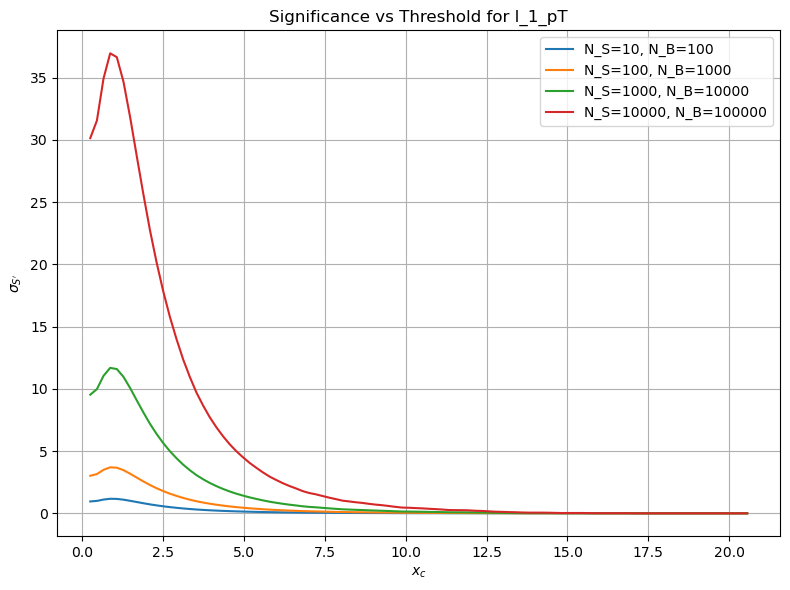

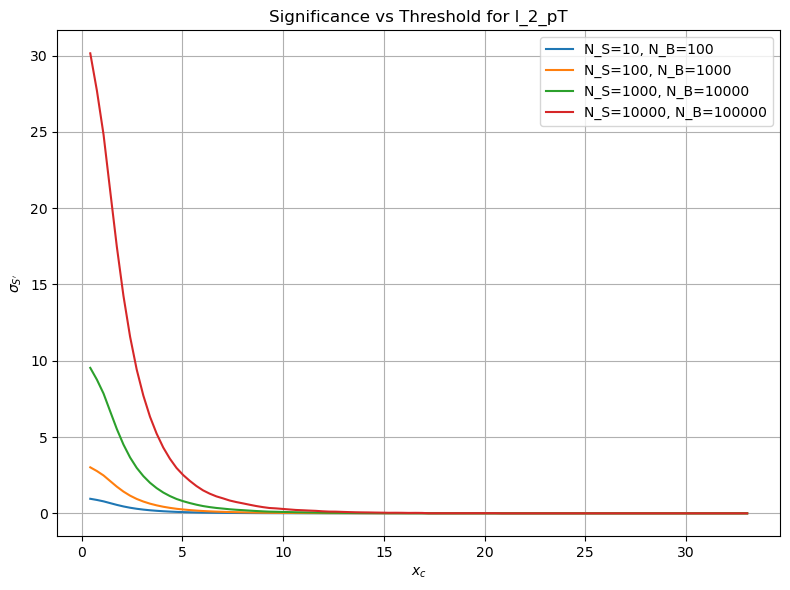

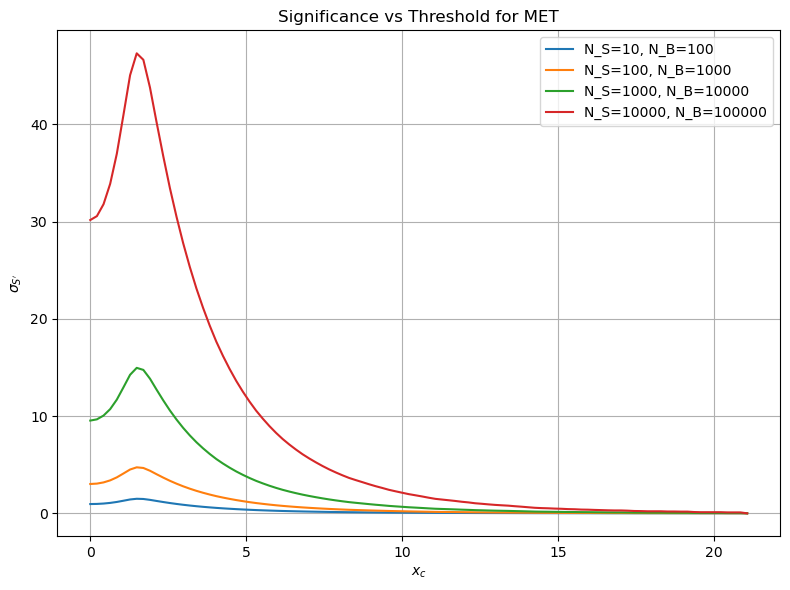

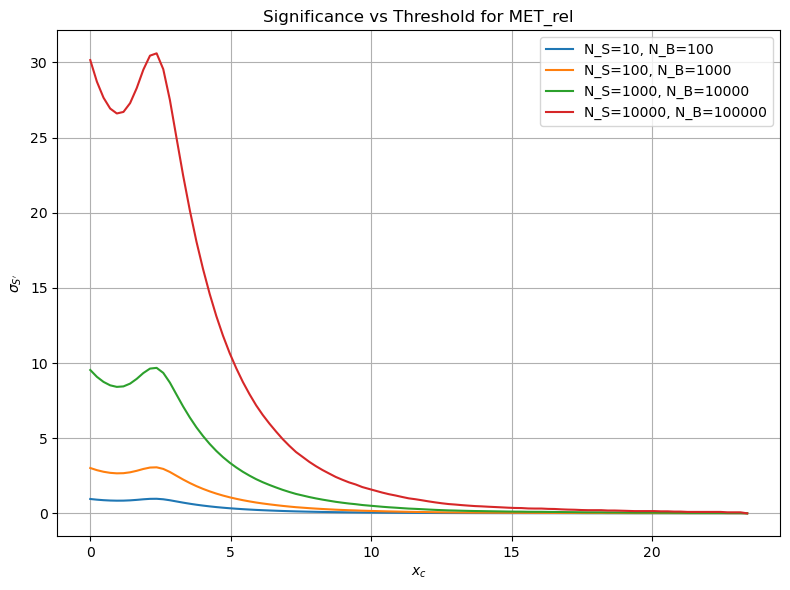

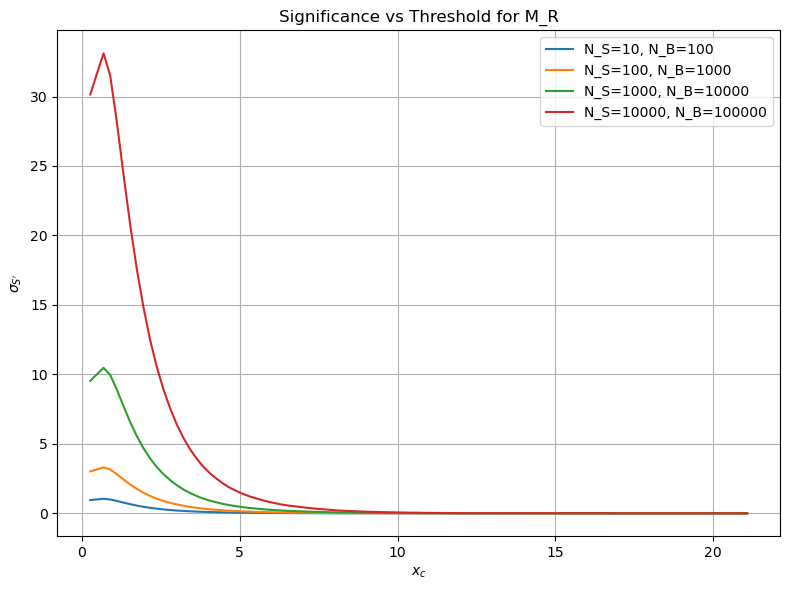

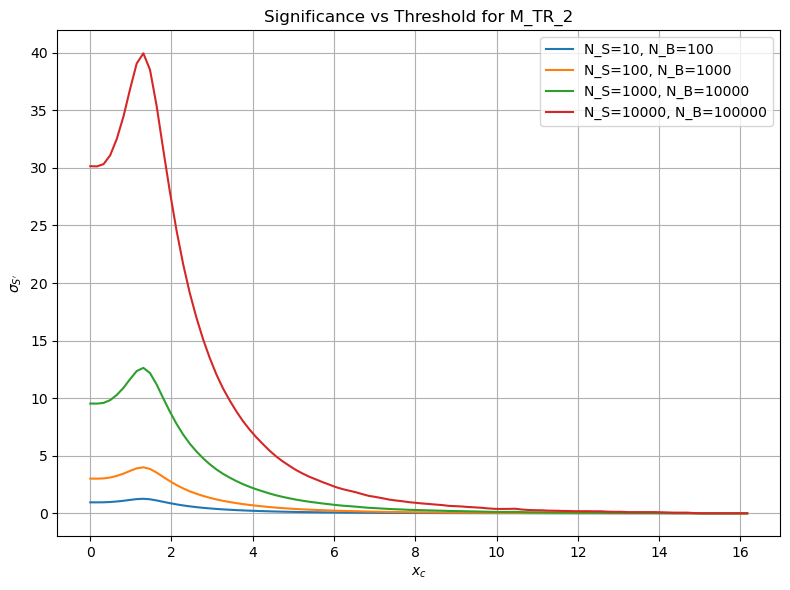

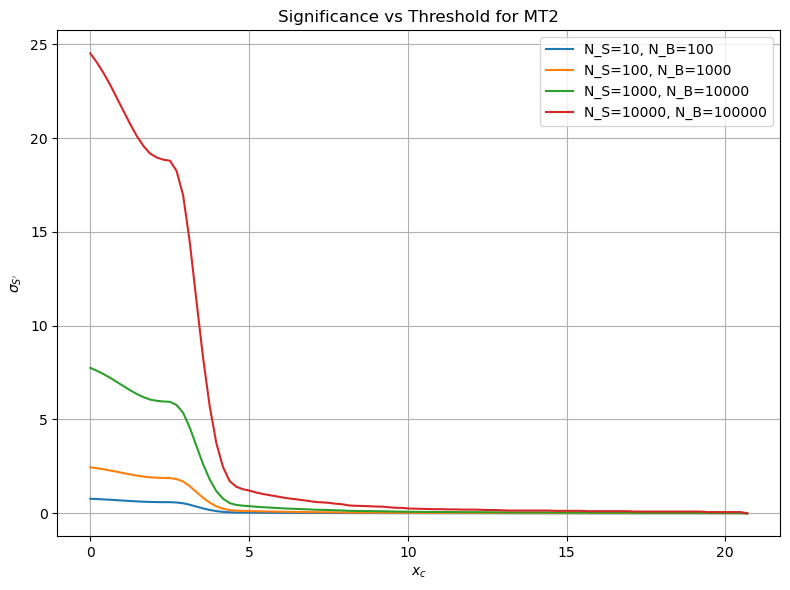

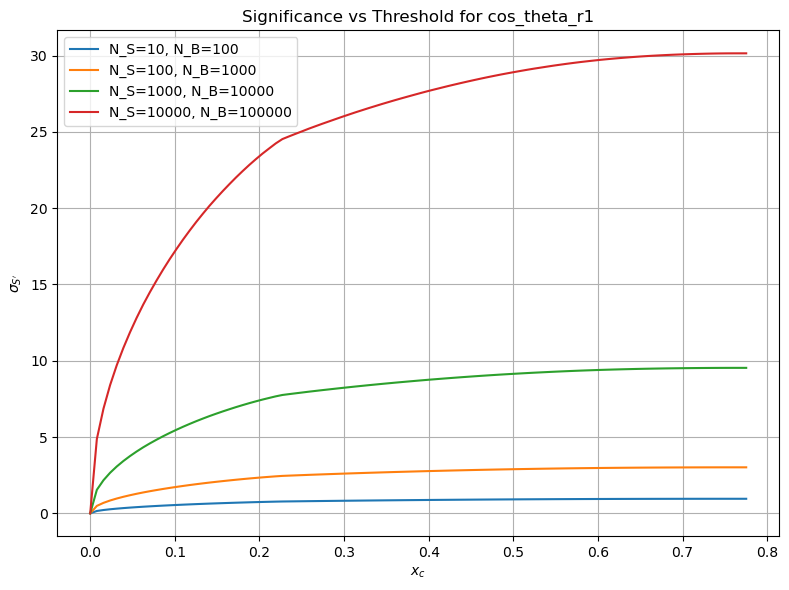

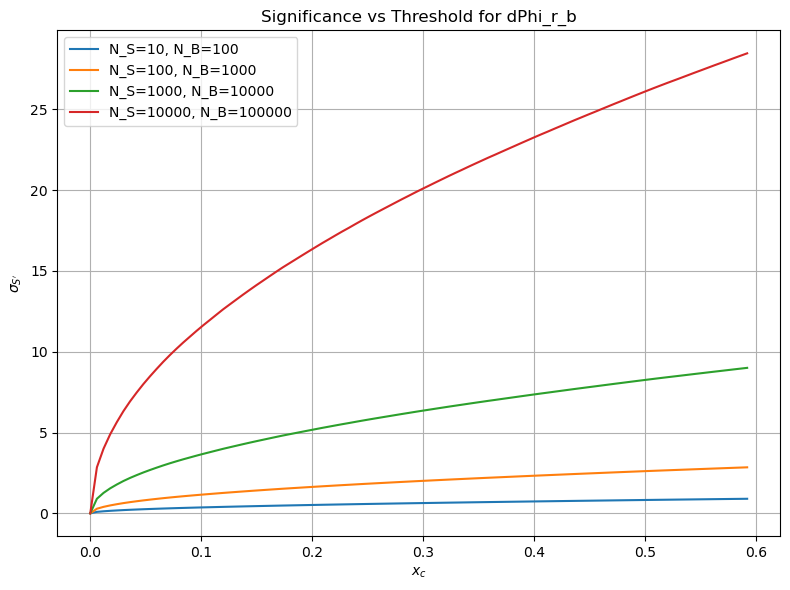

In [80]:
### Exercise 5.3




# Scenarios: (N_S, N_B)
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

# Plot significance for each observable and scenario
for var, rule in selection_rules.items():
    plt.figure(figsize=(8, 6))

    if rule == "greater":
        thresholds = np.linspace(df[var].min(), df[var].max(), 100)
        for N_S, N_B in scenarios:
            sigmas = []
            for x_c in thresholds:
                eps_s = np.mean(df_sig[var] > x_c)
                eps_b = np.mean(df_bkg[var] > x_c)
                N_s_eff = eps_s * N_S
                N_b_eff = eps_b * N_B
                sigma = N_s_eff / np.sqrt(N_s_eff + N_b_eff) if (N_s_eff + N_b_eff) > 0 else 0
                sigmas.append(sigma)
            plt.plot(thresholds, sigmas, label=f"N_S={N_S}, N_B={N_B}")

    elif rule == "center":
        mu = df[var].mean()
        thresholds = np.linspace(0, df[var].max() - mu, 100)
        for N_S, N_B in scenarios:
            sigmas = []
            for x_c in thresholds:
                eps_s = np.mean(np.abs(df_sig[var] - mu) < x_c)
                eps_b = np.mean(np.abs(df_bkg[var] - mu) < x_c)
                N_s_eff = eps_s * N_S
                N_b_eff = eps_b * N_B
                sigma = N_s_eff / np.sqrt(N_s_eff + N_b_eff) if (N_s_eff + N_b_eff) > 0 else 0
                sigmas.append(sigma)
            plt.plot(thresholds, sigmas, label=f"N_S={N_S}, N_B={N_B}")

    plt.xlabel(r"$x_c$")
    plt.ylabel(r"$\sigma_{S'}$")
    plt.title(f"Significance vs Threshold for {var}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [84]:
## Exercise 6: Cut Flow

### Exercise 6.1

from IPython.display import display, HTML

# Define observables and x_c thresholds
cut_variables = {
    "l_1_pT": 50,
    "MET": 60,
    "M_TR_2": 80
}

# Define scenarios (N_S, N_B)
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

# True signal and background subsets from full dataset
df_sig = df[df["signal"] == 1]
df_bkg = df[df["signal"] == 0]

# Function to apply cut and compute survival fractions
def apply_cut(dataframe, variable, threshold, rule="greater"):
    if rule == "greater":
        return dataframe[dataframe[variable] > threshold]
    else:
        return dataframe[np.abs(dataframe[variable] - dataframe[variable].mean()) < threshold]

# Perform cut flow for each scenario
for N_S, N_B in scenarios:
    # Sample from full dataset
    sig_sample = df_sig.sample(n=10000, random_state=42)
    bkg_sample = df_bkg.sample(n=10000, random_state=42)

    cutflow = [["Cut Step", "Cut Applied", "Signal Remaining", "Background Remaining"]]

    # Initial numbers
    eps_s_total = N_S
    eps_b_total = N_B
    cutflow.append(["0", "No cuts", eps_s_total, eps_b_total])

    # Sequentially apply cuts
    for i, (var, x_c) in enumerate(cut_variables.items(), start=1):
        sig_sample = apply_cut(sig_sample, var, x_c)
        bkg_sample = apply_cut(bkg_sample, var, x_c)

        # Efficiency from sampled subset
        eff_s = len(sig_sample) / 10000
        eff_b = len(bkg_sample) / 10000

        # Apply to original event counts
        eps_s_total = eff_s * N_S
        eps_b_total = eff_b * N_B

        cutflow.append([
            str(i),
            f"{var} > {x_c}",
            f"{eps_s_total:.2f}",
            f"{eps_b_total:.2f}"
        ])

    # Display cutflow table
    html_table = tabulate.tabulate(cutflow, headers="firstrow", tablefmt="html")
    display(HTML(f"<h3>Cut Flow Table for Scenario: N_S={N_S}, N_B={N_B}</h3>{html_table}"))

In [86]:
### Exercise 6.2

# Define observables and thresholds
cut_variables = {
    "l_1_pT": 50,
    "MET": 60,
    "M_TR_2": 80
}

# Scenarios: (N_S, N_B)
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

# Full signal and background sets
df_sig = df[df["signal"] == 1]
df_bkg = df[df["signal"] == 0]

# Function to apply cut
def apply_cut(dataframe, variable, threshold):
    return dataframe[dataframe[variable] > threshold]

# Loop over scenarios
for N_S, N_B in scenarios:
    sig_sample = df_sig.sample(n=10000, random_state=42)
    bkg_sample = df_bkg.sample(n=10000, random_state=42)

    base_sig = sig_sample.copy()
    base_bkg = bkg_sample.copy()

    cutflow = [["Cut", "Cut Applied", "ε_S", "ε_B", "N'_S", "N'_B", "σ_S'"]]

    # Before any cut
    cutflow.append(["0", "No cuts", "1.000", "1.000", f"{N_S}", f"{N_B}", f"{N_S / np.sqrt(N_S + N_B):.3f}"])

    for i, (var, x_c) in enumerate(cut_variables.items(), start=1):
        base_sig = apply_cut(base_sig, var, x_c)
        base_bkg = apply_cut(base_bkg, var, x_c)

        eps_s = len(base_sig) / 10000
        eps_b = len(base_bkg) / 10000

        N_s_eff = eps_s * N_S
        N_b_eff = eps_b * N_B

        sigma_s = N_s_eff / np.sqrt(N_s_eff + N_b_eff) if (N_s_eff + N_b_eff) > 0 else 0

        cutflow.append([
            str(i),
            f"{var} > {x_c}",
            f"{eps_s:.3f}",
            f"{eps_b:.3f}",
            f"{N_s_eff:.2f}",
            f"{N_b_eff:.2f}",
            f"{sigma_s:.3f}"
        ])

    # Display formatted HTML table
    html_table = tabulate.tabulate(cutflow, headers="firstrow", tablefmt="html")
    display(HTML(f"<h3>Detailed Cut-Flow Table for Scenario: N_S={N_S}, N_B={N_B}</h3>{html_table}"))

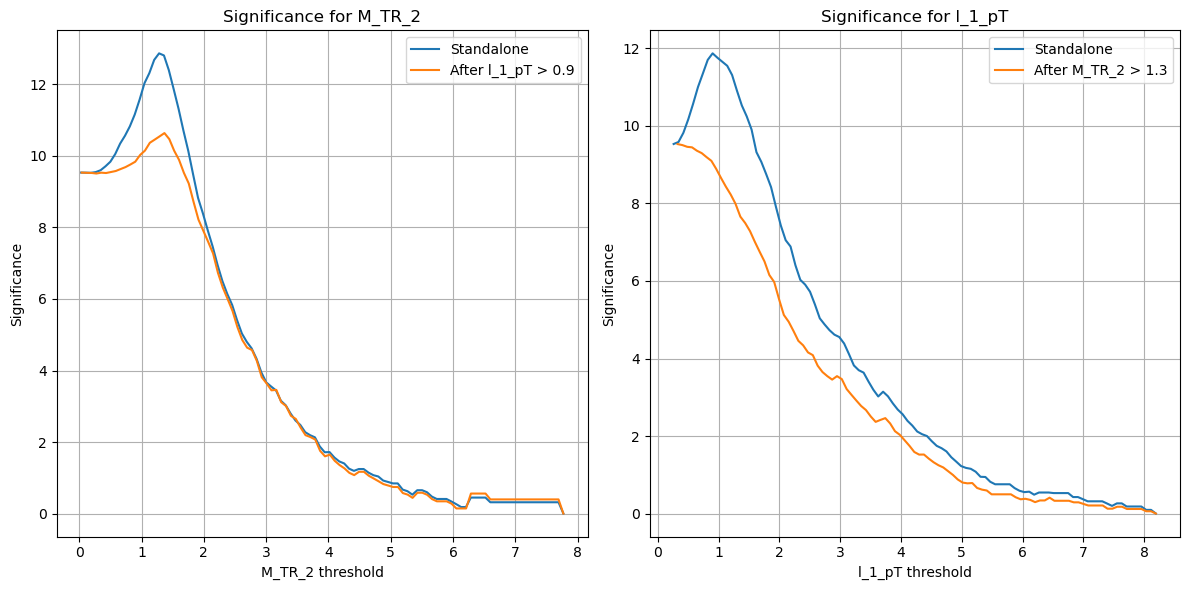

In [88]:
### Exercise 6.3

# Use a manageable sample for fast computation
sig_sample = df_sig.sample(n=10000, random_state=1)
bkg_sample = df_bkg.sample(n=10000, random_state=1)

# Variables to test
var1 = "l_1_pT"
var2 = "M_TR_2"

# Scenario
N_S = 1000
N_B = 10000

def compute_significance(var, sig_data, bkg_data):
    thresholds = np.linspace(sig_data[var].min(), sig_data[var].max(), 100)
    sigmas = []
    for x_c in thresholds:
        eps_s = np.mean(sig_data[var] > x_c)
        eps_b = np.mean(bkg_data[var] > x_c)
        N_s_eff = eps_s * N_S
        N_b_eff = eps_b * N_B
        sigma = N_s_eff / np.sqrt(N_s_eff + N_b_eff) if (N_s_eff + N_b_eff) > 0 else 0
        sigmas.append((x_c, sigma))
    return thresholds, sigmas

# Compute individual significance (no other cut)
_, sigmas_var1 = compute_significance(var1, sig_sample, bkg_sample)
_, sigmas_var2 = compute_significance(var2, sig_sample, bkg_sample)

#  Cut on var1 first, re-optimize var2
best_cut_var1 = max(sigmas_var1, key=lambda x: x[1])[0]
sig_cut = sig_sample[sig_sample[var1] > best_cut_var1]
bkg_cut = bkg_sample[bkg_sample[var1] > best_cut_var1]
_, sigmas_var2_after_var1 = compute_significance(var2, sig_cut, bkg_cut)

# Cut on var2 first, re-optimize var1
best_cut_var2 = max(sigmas_var2, key=lambda x: x[1])[0]
sig_cut = sig_sample[sig_sample[var2] > best_cut_var2]
bkg_cut = bkg_sample[bkg_sample[var2] > best_cut_var2]
_, sigmas_var1_after_var2 = compute_significance(var1, sig_cut, bkg_cut)

# --- Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(*zip(*sigmas_var2), label="Standalone")
plt.plot(*zip(*sigmas_var2_after_var1), label=f"After {var1} > {best_cut_var1:.1f}")
plt.title(f"Significance for {var2}")
plt.xlabel(f"{var2} threshold")
plt.ylabel("Significance")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(*zip(*sigmas_var1), label="Standalone")
plt.plot(*zip(*sigmas_var1_after_var2), label=f"After {var2} > {best_cut_var2:.1f}")
plt.title(f"Significance for {var1}")
plt.xlabel(f"{var1} threshold")
plt.ylabel("Significance")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

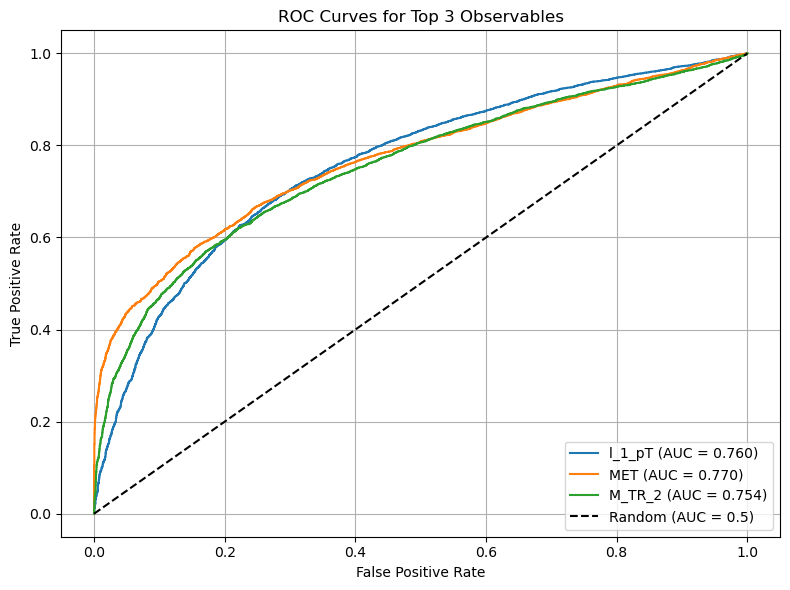

In [90]:
## Exercise 7: ROC Curves

### Exercise 7.1

from sklearn.metrics import roc_curve, auc

observables = ["l_1_pT", "MET", "M_TR_2"]

# Sample a subset for performance
df_sample = df.sample(n=10000, random_state=1)

# Ground truth
y_true = df_sample["signal"].values

# Plot ROC curves
plt.figure(figsize=(8, 6))
for var in observables:
    scores = df_sample[var].values
    fpr, tpr, _ = roc_curve(y_true, scores)
    auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{var} (AUC = {auc_val:.3f})")

# Plot formatting
plt.plot([0, 1], [0, 1], "k--", label="Random (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Top 3 Observables")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [101]:
### Exercise 7.2

def plot_roc_curves(df, observables, label_col="signal", sample_size=10000, title="ROC Curves"):
   
    # Sample the dataset if specified
    if sample_size and len(df) > sample_size:
        df = df.sample(n=sample_size, random_state=1)

    y_true = df[label_col].values

    plt.figure(figsize=(8, 6))
    for var in observables:
        scores = df[var].values
        fpr, tpr, _ = roc_curve(y_true, scores)
        auc_val = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{var} (AUC = {auc_val:.3f})")

    # Plot random baseline
    plt.plot([0, 1], [0, 1], "k--", label="Random (AUC = 0.5)")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<Figure size 800x600 with 0 Axes>

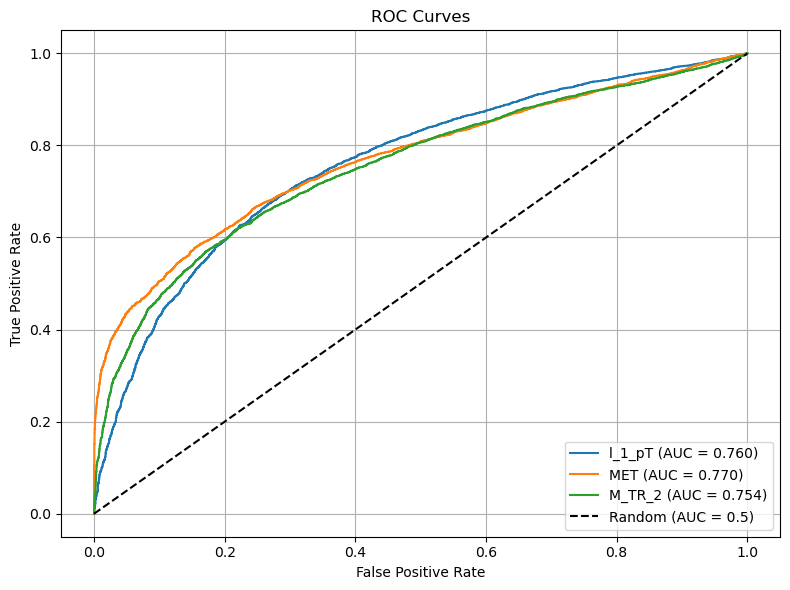

In [103]:
plot_roc_curves(df, ["l_1_pT", "MET", "M_TR_2"])


In [107]:
### Exercise 7.3

def plot_roc_curves(df, observables, label_col="signal", sample_size=10000, title="ROC Curves"):

    # Sample the dataset if specified
    if sample_size and len(df) > sample_size:
        df = df.sample(n=sample_size, random_state=1)

    # Skip if no data
    if df.empty or df[label_col].nunique() < 2:
        print(f"Warning: Skipping plot '{title}' – insufficient class variety.")
        return

    y_true = df[label_col].values

    plt.figure(figsize=(8, 6))
    for var in observables:
        scores = df[var].values

        # Skip if this variable has no variation
        if len(np.unique(scores)) < 2:
            continue

        try:
            fpr, tpr, _ = roc_curve(y_true, scores)
            auc_val = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{var} (AUC = {auc_val:.3f})")
        except ValueError as e:
            print(f"Could not compute ROC for {var}: {e}")

    plt.plot([0, 1], [0, 1], "k--", label="Random (AUC = 0.5)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<Figure size 800x600 with 0 Axes>

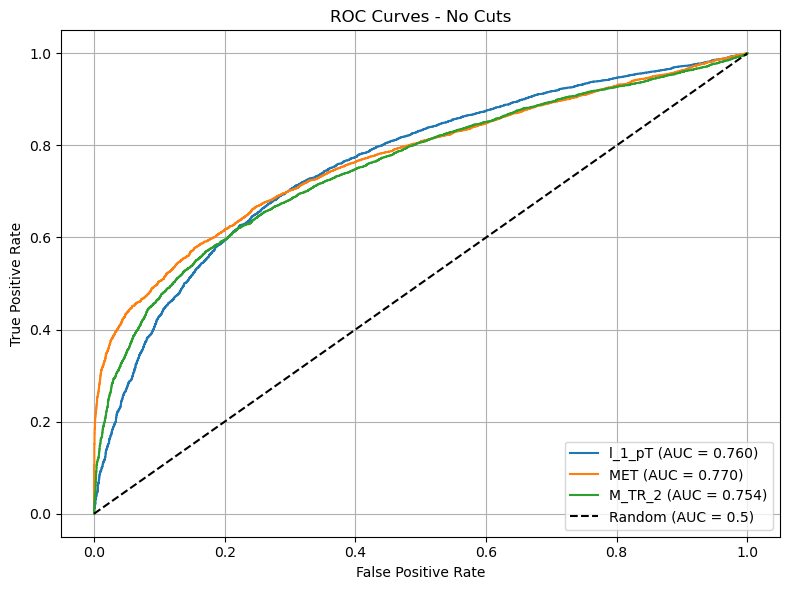

In [109]:
cut1 = df[df["l_1_pT"] > 50]
cut2 = cut1[cut1["MET"] > 60]
cut3 = cut2[cut2["M_TR_2"] > 80]

plot_roc_curves(df, ["l_1_pT", "MET", "M_TR_2"], title="ROC Curves - No Cuts")
plot_roc_curves(cut1, ["l_1_pT", "MET", "M_TR_2"], title="ROC Curves - After l_1_pT > 50")
plot_roc_curves(cut2, ["l_1_pT", "MET", "M_TR_2"], title="ROC Curves - After MET > 60")
plot_roc_curves(cut3, ["l_1_pT", "MET", "M_TR_2"], title="ROC Curves - After M_TR_2 > 80")


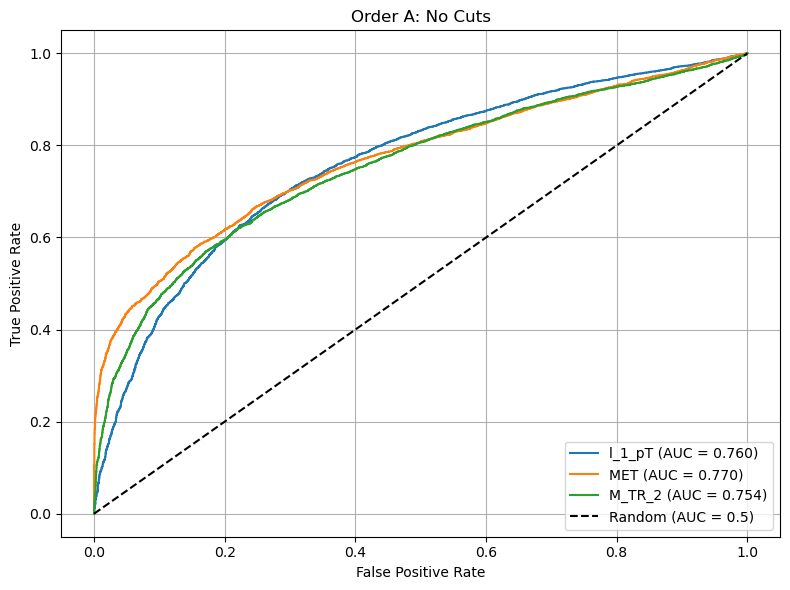

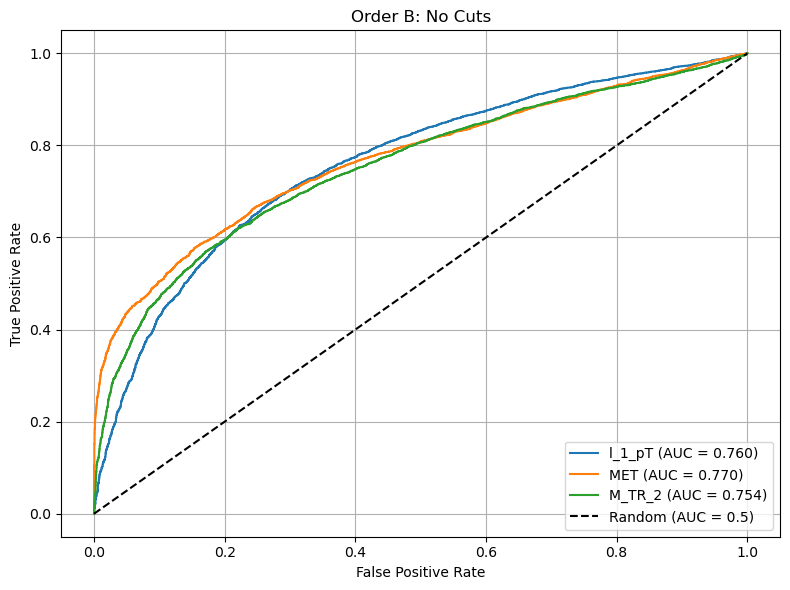

In [111]:
### Exercise 7.

# -------------------------------
# ORDER A: l_1_pT -> MET -> M_TR_2
# -------------------------------
cut_a1 = df[df["l_1_pT"] > 50]
cut_a2 = cut_a1[cut_a1["MET"] > 60]
cut_a3 = cut_a2[cut_a2["M_TR_2"] > 80]

plot_roc_curves(df, ["l_1_pT", "MET", "M_TR_2"], title="Order A: No Cuts")
plot_roc_curves(cut_a1, ["l_1_pT", "MET", "M_TR_2"], title="Order A: After l_1_pT > 50")
plot_roc_curves(cut_a2, ["l_1_pT", "MET", "M_TR_2"], title="Order A: After MET > 60")
plot_roc_curves(cut_a3, ["l_1_pT", "MET", "M_TR_2"], title="Order A: After M_TR_2 > 80")

# -------------------------------
# ORDER B: M_TR_2 -> MET -> l_1_pT
# -------------------------------
cut_b1 = df[df["M_TR_2"] > 80]
cut_b2 = cut_b1[cut_b1["MET"] > 60]
cut_b3 = cut_b2[cut_b2["l_1_pT"] > 50]

plot_roc_curves(df, ["l_1_pT", "MET", "M_TR_2"], title="Order B: No Cuts")
plot_roc_curves(cut_b1, ["l_1_pT", "MET", "M_TR_2"], title="Order B: After M_TR_2 > 80")
plot_roc_curves(cut_b2, ["l_1_pT", "MET", "M_TR_2"], title="Order B: After MET > 60")
plot_roc_curves(cut_b3, ["l_1_pT", "MET", "M_TR_2"], title="Order B: After l_1_pT > 50")


In [113]:
## Exercise 8: Linear Discriminant

### Exercise 8.1

# Select features
features = ["l_1_pT", "MET", "M_TR_2"]

# Split data
X_signal = df[df["signal"] == 1][features].values
X_background = df[df["signal"] == 0][features].values

# Compute class means
m1 = np.mean(X_signal, axis=0).reshape(-1, 1)  # Signal
m2 = np.mean(X_background, axis=0).reshape(-1, 1)  # Background

# Compute between-class scatter matrix S_B
S_B = (m2 - m1).dot((m2 - m1).T)

# Compute within-class scatter matrix S_W
S_W = np.zeros((len(features), len(features)))

for X_class, m in [(X_signal, m1), (X_background, m2)]:
    for x in X_class:
        x = x.reshape(-1, 1)
        S_W += (x - m).dot((x - m).T)

# Output the matrices
S_B, S_W


(array([[0.2856591 , 0.41093139, 0.26508975],
        [0.41093139, 0.59114029, 0.38134159],
        [0.26508975, 0.38134159, 0.24600152]]),
 array([[2007638.20409943,  644789.20617039, 1125178.73130217],
        [ 644789.20617039, 3076060.48106419, 1367248.92417468],
        [1125178.73130217, 1367248.92417468, 1400658.00587673]]))

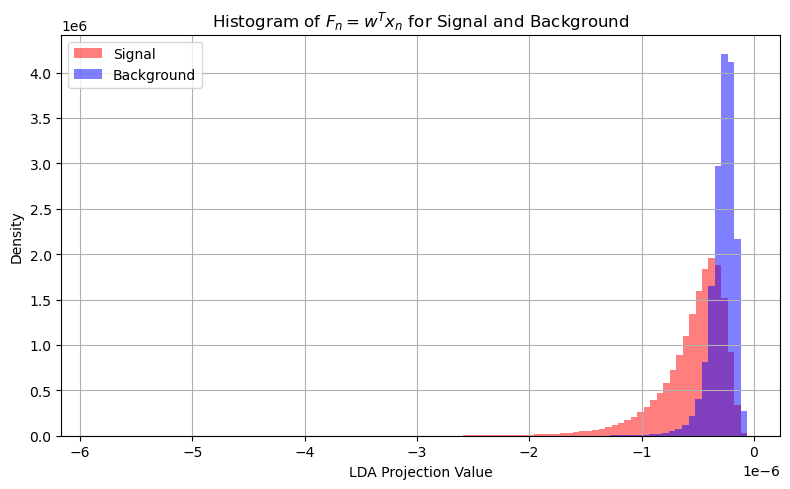

In [115]:
### Exercise 8.2

# Use top 3 features
features = ["l_1_pT", "MET", "M_TR_2"]

# Get data
X_signal = df[df["signal"] == 1][features].values
X_background = df[df["signal"] == 0][features].values

# Compute class means
m1 = np.mean(X_signal, axis=0).reshape(-1, 1)
m2 = np.mean(X_background, axis=0).reshape(-1, 1)

# Compute within-class scatter matrix S_W
S_W = np.zeros((len(features), len(features)))
for X_class, m in [(X_signal, m1), (X_background, m2)]:
    for x in X_class:
        x = x.reshape(-1, 1)
        S_W += (x - m).dot((x - m).T)

# Compute LDA coefficients
w = np.linalg.inv(S_W).dot(m2 - m1)

# Project data
F_signal = X_signal.dot(w).flatten()
F_background = X_background.dot(w).flatten()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(F_signal, bins=100, alpha=0.5, label="Signal", color="red", density=True)
plt.hist(F_background, bins=100, alpha=0.5, label="Background", color="blue", density=True)
plt.title("Histogram of $F_n = w^T x_n$ for Signal and Background")
plt.xlabel("LDA Projection Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


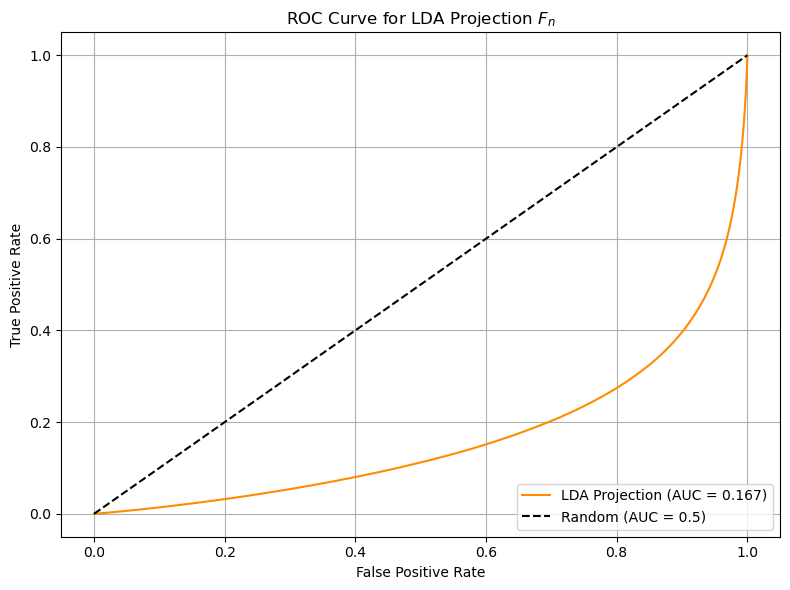

In [117]:
### Exercise 8.3

# Features and data
features = ["l_1_pT", "MET", "M_TR_2"]
X = df[features].values
y = df["signal"].values

# Class means
X_signal = df[df["signal"] == 1][features].values
X_background = df[df["signal"] == 0][features].values
m1 = np.mean(X_signal, axis=0).reshape(-1, 1)
m2 = np.mean(X_background, axis=0).reshape(-1, 1)

# Within-class scatter
S_W = np.zeros((len(features), len(features)))
for X_class, m in [(X_signal, m1), (X_background, m2)]:
    for x in X_class:
        x = x.reshape(-1, 1)
        S_W += (x - m).dot((x - m).T)

# Compute LDA vector
w = np.linalg.inv(S_W).dot(m2 - m1)

# Project all samples
F_all = X.dot(w).flatten()

# Compute ROC
fpr, tpr, _ = roc_curve(y, F_all)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"LDA Projection (AUC = {roc_auc:.3f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LDA Projection $F_n$")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [119]:
### Exersice 8.4

# Features to use
features = ["l_1_pT", "MET", "M_TR_2"]
X = df[features].values
y = df["signal"].values

# Compute class means
X_signal = df[df["signal"] == 1][features].values
X_background = df[df["signal"] == 0][features].values
m1 = np.mean(X_signal, axis=0).reshape(-1, 1)
m2 = np.mean(X_background, axis=0).reshape(-1, 1)

# Compute within-class scatter
S_W = np.zeros((len(features), len(features)))
for X_class, m in [(X_signal, m1), (X_background, m2)]:
    for x in X_class:
        x = x.reshape(-1, 1)
        S_W += (x - m).dot((x - m).T)

# Compute LDA projection vector w
w = np.linalg.inv(S_W).dot(m2 - m1)

# Project all samples
F_all = X.dot(w).flatten()
F_signal = F_all[y == 1]
F_background = F_all[y == 0]

# Define significance function
def compute_max_significance(F_signal, F_background, N_S, N_B):
    thresholds = np.linspace(min(F_all), max(F_all), 200)
    max_sigma = 0
    for x_c in thresholds:
        eps_s = np.mean(F_signal > x_c)
        eps_b = np.mean(F_background > x_c)
        N_s_eff = eps_s * N_S
        N_b_eff = eps_b * N_B
        if (N_s_eff + N_b_eff) > 0:
            sigma = N_s_eff / np.sqrt(N_s_eff + N_b_eff)
            max_sigma = max(max_sigma, sigma)
    return max_sigma

# Scenarios
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

# Compute and store maximum significance for each
results = []
for N_S, N_B in scenarios:
    sigma_max = compute_max_significance(F_signal, F_background, N_S, N_B)
    results.append((N_S, N_B, sigma_max))

results


[(10, 100, 0.9534627490407807),
 (100, 1000, 3.0151139510943903),
 (1000, 10000, 9.534627490407805),
 (10000, 100000, 30.151139510943903)]